___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, XGBoost,and Neural Network*** algorithms and ***Unbalanced Data Techniques*** . Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***other libraries*** in a variety of ways. Also, you will calibrate your model outputs.

Data drift and model drirft are key consepts about ML and MLOPS, you can monitor and check your data and models with plenty of ways and tools. ***Deepchecks*** is one of them and the leading tool for testing and for validating your machine learning models and data, and it enables doing so with minimal effort. In this project, you will apply ***Data Integrity, Train-Test Validation, and Model Evaluation*** checks.
Deepchecks Introduction : https://youtu.be/7ELdizoi6BU

After the ML Deployment Course, you will able to deploy your model by ***Streamlit API***.

Before diving into the project, please take a look at the Determines and Tasks.

---
---


# #Determines
The dataset was collected from credit card transactions made by European cardholders in 2023, with sensitive information removed to ensure privacy and compliance with ethical guidelines. It has **550,000** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for small amount of all transactions.

**Feature Information:**

- **id:** Unique identifier for each transaction
- **V1-V28:** Anonymized features representing various transaction attributes (e.g., time, location, etc.)
- **Amount:** The transaction amount
- **Class:** Binary label indicating whether the transaction is fraudulent (1) or not (0)

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can display the distribution of the target variable's classes over other variables.
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with.

Start with Logistic Regression and evaluate model performance. You will apply the Unbalanced Data Techniques used to increase the performance. Next, observe their effects.

Then, you will use four different algorithms in the model building phase.

In the final step, you will prapare your model for deployment.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Apply data integrity checks
- Exploratory Data Analysis
- Data Cleaning
    
#### 2. Data Preprocessing

- Train - Test Split
- Train - Test Split Validation Checks
- Scaling

#### 3. Model Building

- Logistic Regression
- Random Forest Classifier
- XGBoost Classifier
- Neural Network

#### 4. Model Deployement

- Save and Export the Best Model
- Save and Export Variables




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import pickle


from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, average_precision_score

import tensorflow as tf
import keras
# from tensorflow.keras.metrics import Recall
from tensorflow.keras import layers, models
import keras_tuner as kt

from sklearn.utils import class_weight

from imblearn.over_sampling import SMOTE
from collections import Counter


# Settings for better visuals
sns.set(style='whitegrid')

In [3]:
# Load dataset
df = pd.read_csv('creditcard.csv')

# Basic info
print("Shape of the dataset:", df.shape)
print("\nData types:\n", df.dtypes)
df.head()

Shape of the dataset: (284807, 31)

Data types:
 Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


## Apply Data Integrity Checks
* link: https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_data_integrity.html

In [5]:
from deepchecks.tabular import Dataset
from deepchecks.tabular.suites import data_integrity

# Make sure your label column is named correctly
ds = Dataset(df, label='Class', cat_features=[])

# Run the data integrity suite
integrity_suite = data_integrity()
result = integrity_suite.run(ds)

# Display the results in a notebook
result.show()

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_63LRSU7CN3N2GYWSFD95G74A9">Data Integrity Sui…

In [6]:
# Check for missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [7]:
# Check for class imbalance
print("\nTarget class distribution:\n", df['Class'].value_counts(normalize=True))


Target class distribution:
 Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


In [8]:
# Count duplicated rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 1081


In [9]:
# Drop the duplicates
df = df.drop_duplicates()

# Confirm the new shape
print("New dataset shape after removing duplicates:", df.shape)

New dataset shape after removing duplicates: (283726, 31)


In [10]:
# Check for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Exploratory Data Analysis

##### A. Class distrbution plot

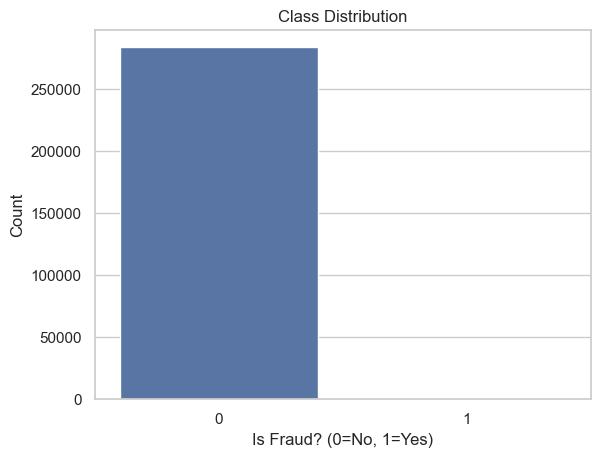

In [11]:
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.xlabel('Is Fraud? (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

##### B. Distribution of Amount

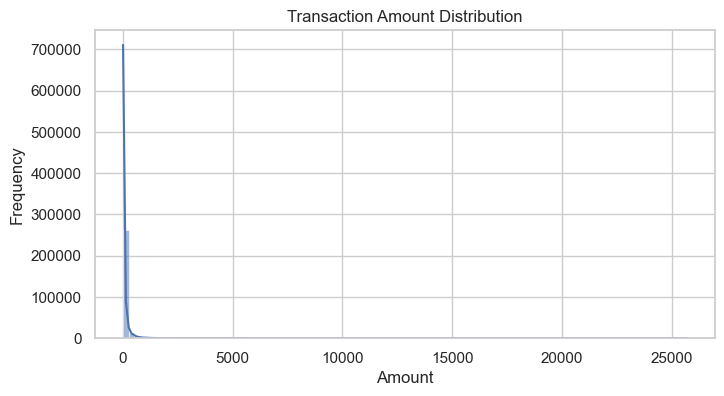

In [12]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Amount'], bins=100, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


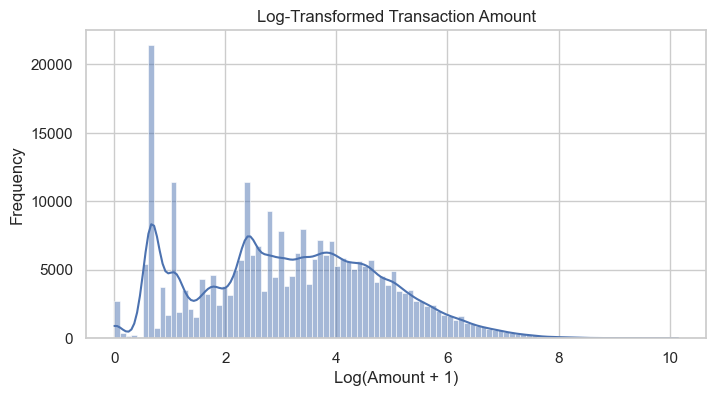

In [13]:
log_amount = np.log1p(df['Amount'])

plt.figure(figsize=(8, 4))
sns.histplot(log_amount, bins=100, kde=True)
plt.title('Log-Transformed Transaction Amount')
plt.xlabel('Log(Amount + 1)')
plt.ylabel('Frequency')
plt.show()


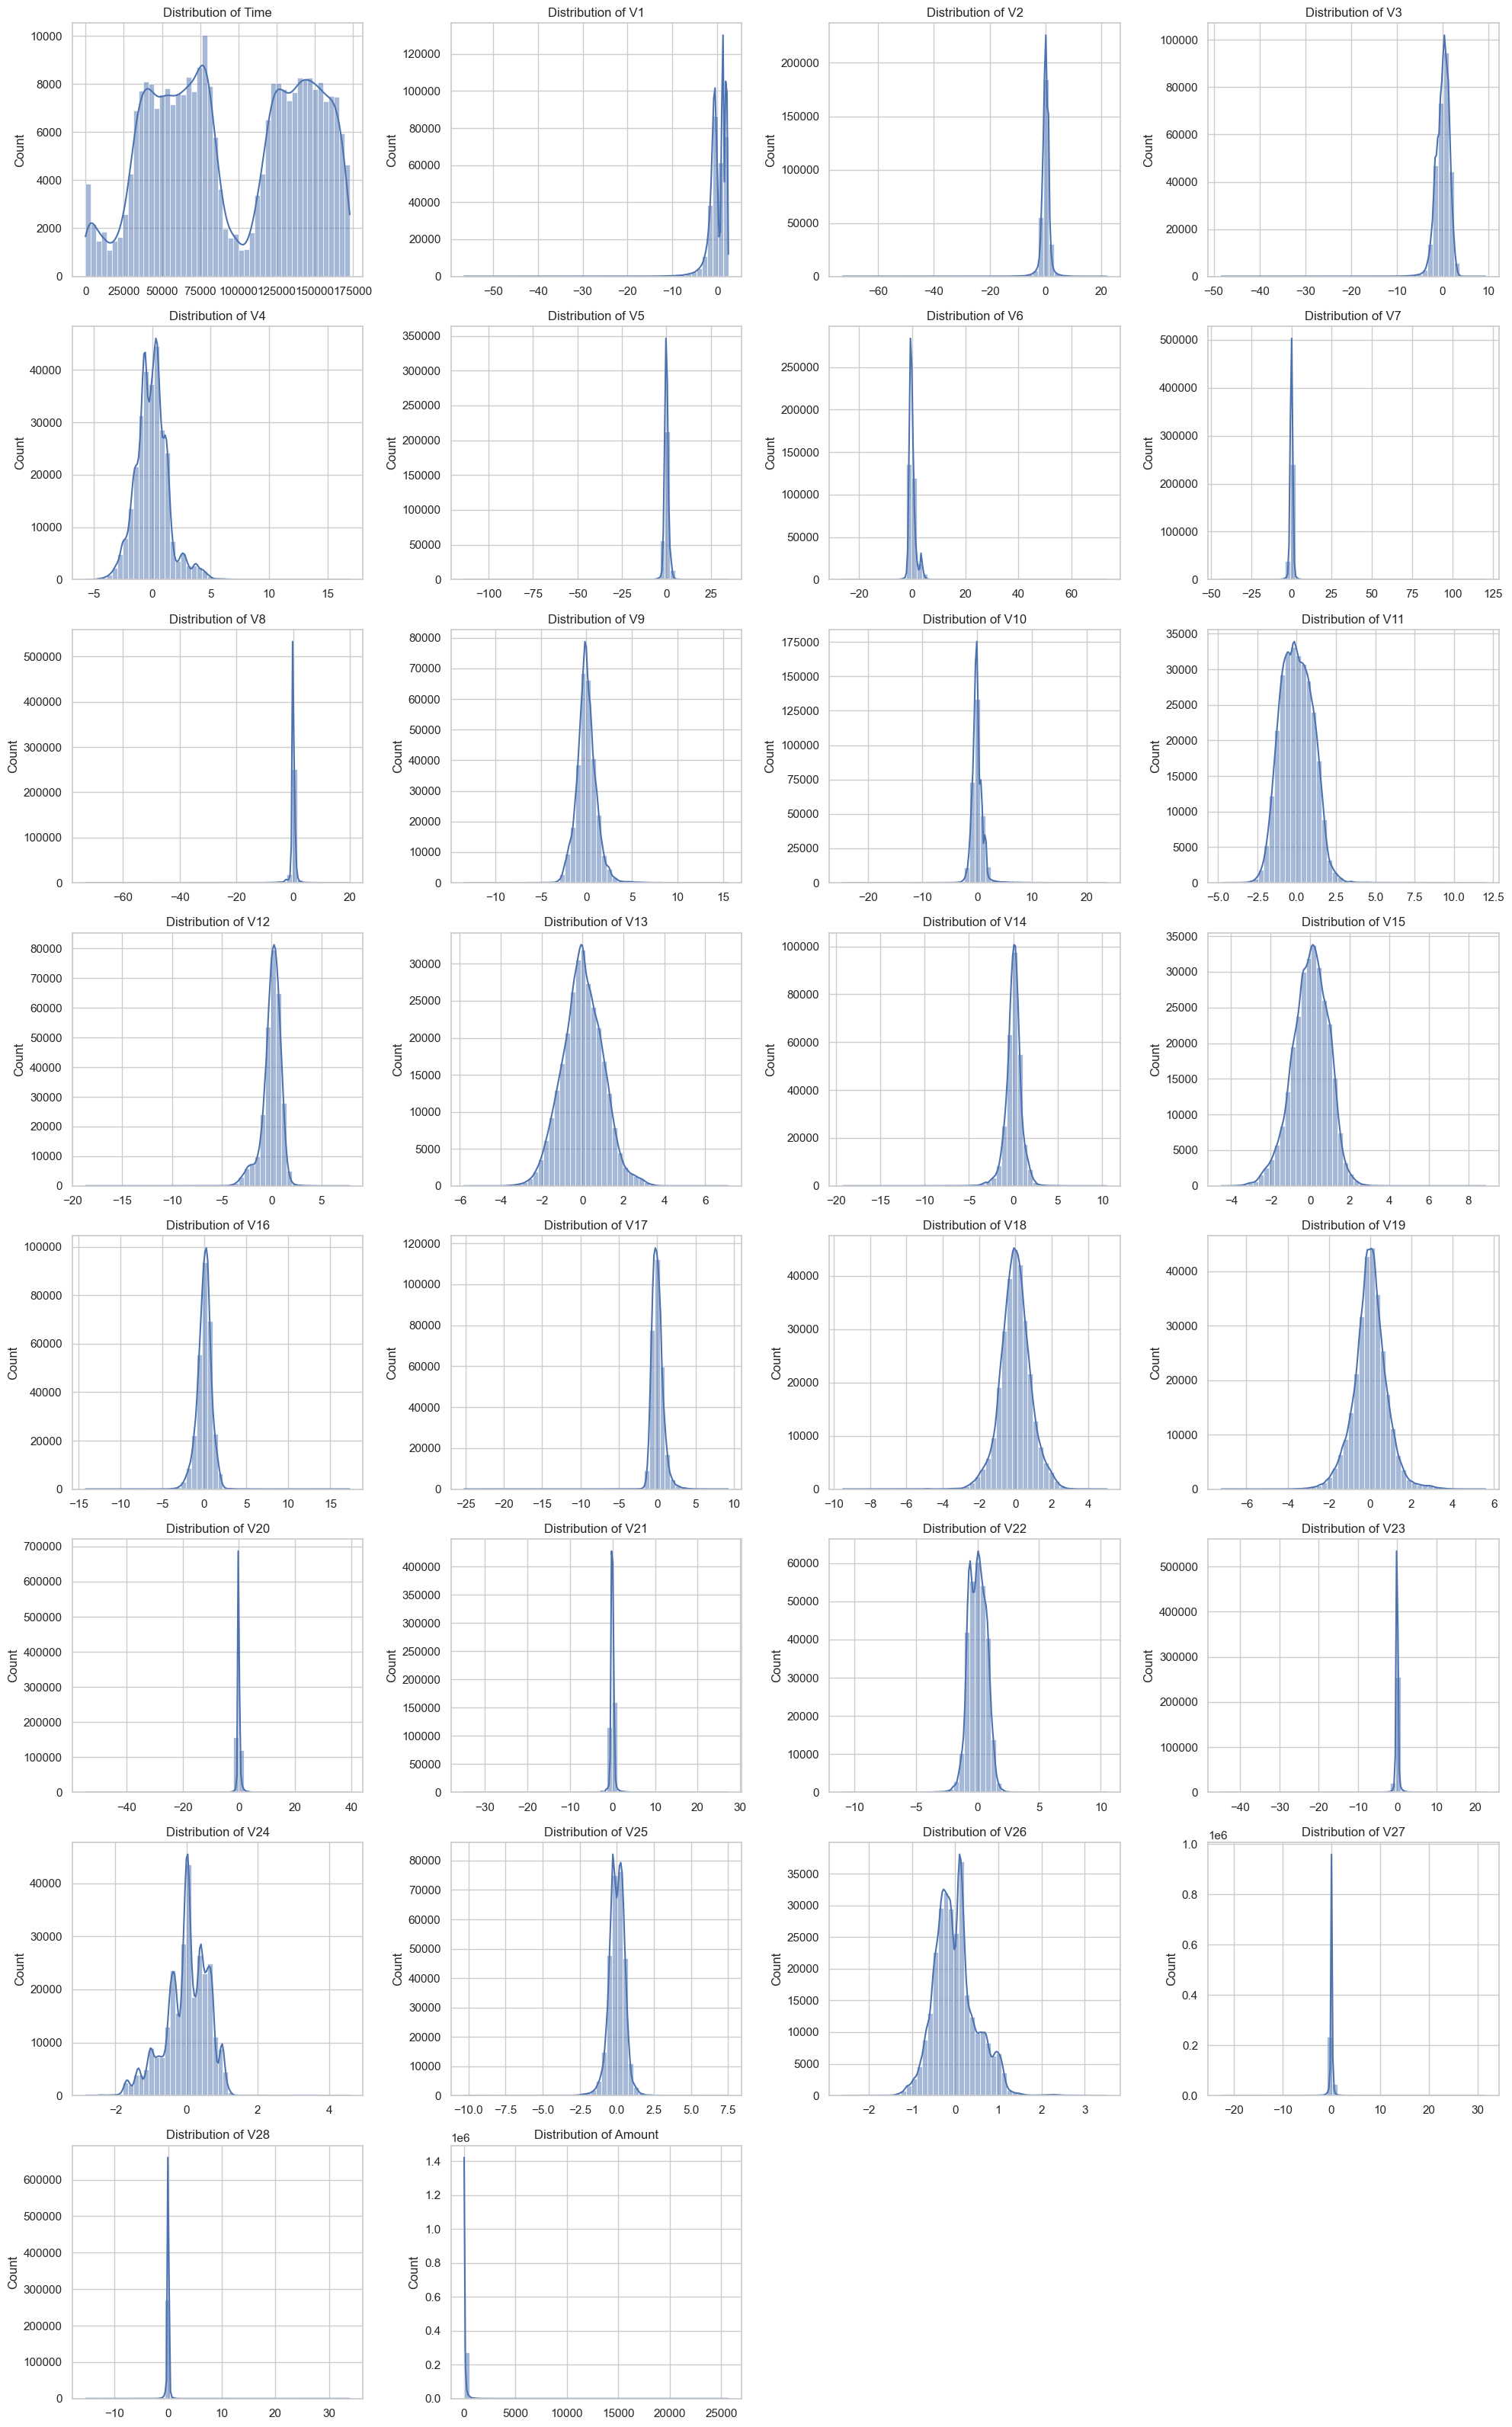

In [14]:
# Drop target variable for plotting
features_only = df.drop(columns=['Class'])

# Set plot style
sns.set(style='whitegrid')
num_features = features_only.shape[1]
n_cols = 4
n_rows = (num_features + n_cols - 1) // n_cols

# Plot distributions
plt.figure(figsize=(20, 4 * n_rows))
for i, column in enumerate(features_only.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[column], bins=50, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel('')
    plt.tight_layout()

plt.show()


In [15]:
# Convert 'Time' (which is seconds since the first transaction)
# into a more interpretable feature: 'Hour' of the day.
# This helps reveal daily patterns in transaction behavior and fraud activity.
# The transformation extracts the hour in a 24-hour format.

# Make sure df is a copy 
df = df.copy()

# Convert 'Time' (seconds since first transaction) into 'Hour of Day'
df['Hour'] = (df['Time'] // 3600) % 24  # Extract hour in 24-hour format

# Drop the original 'Time' column
df = df.drop(columns=['Time'])

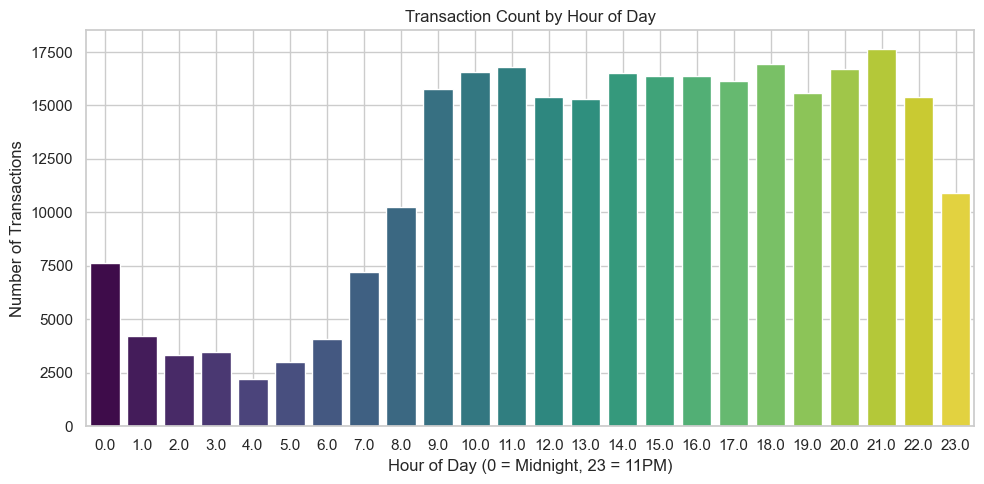

In [16]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Hour', hue='Hour', data=df, palette='viridis', legend=False)
plt.title('Transaction Count by Hour of Day')
plt.xlabel('Hour of Day (0 = Midnight, 23 = 11PM)')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.tight_layout()
plt.show()

##### C. Boxplots to Spot Outliers

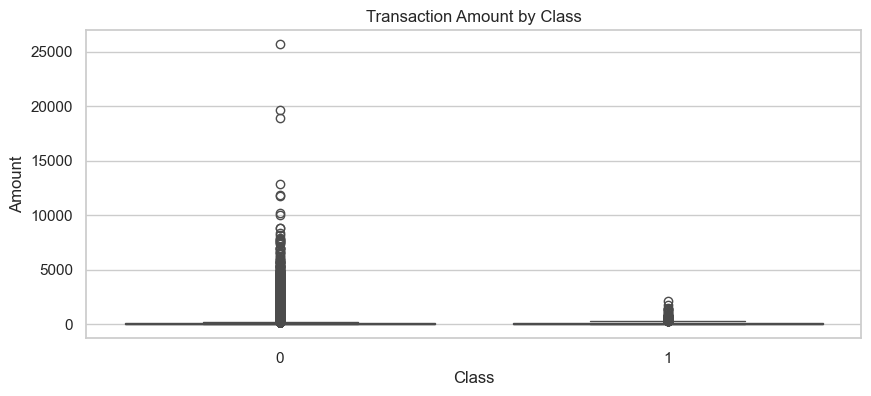

In [17]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amount by Class')
plt.show()


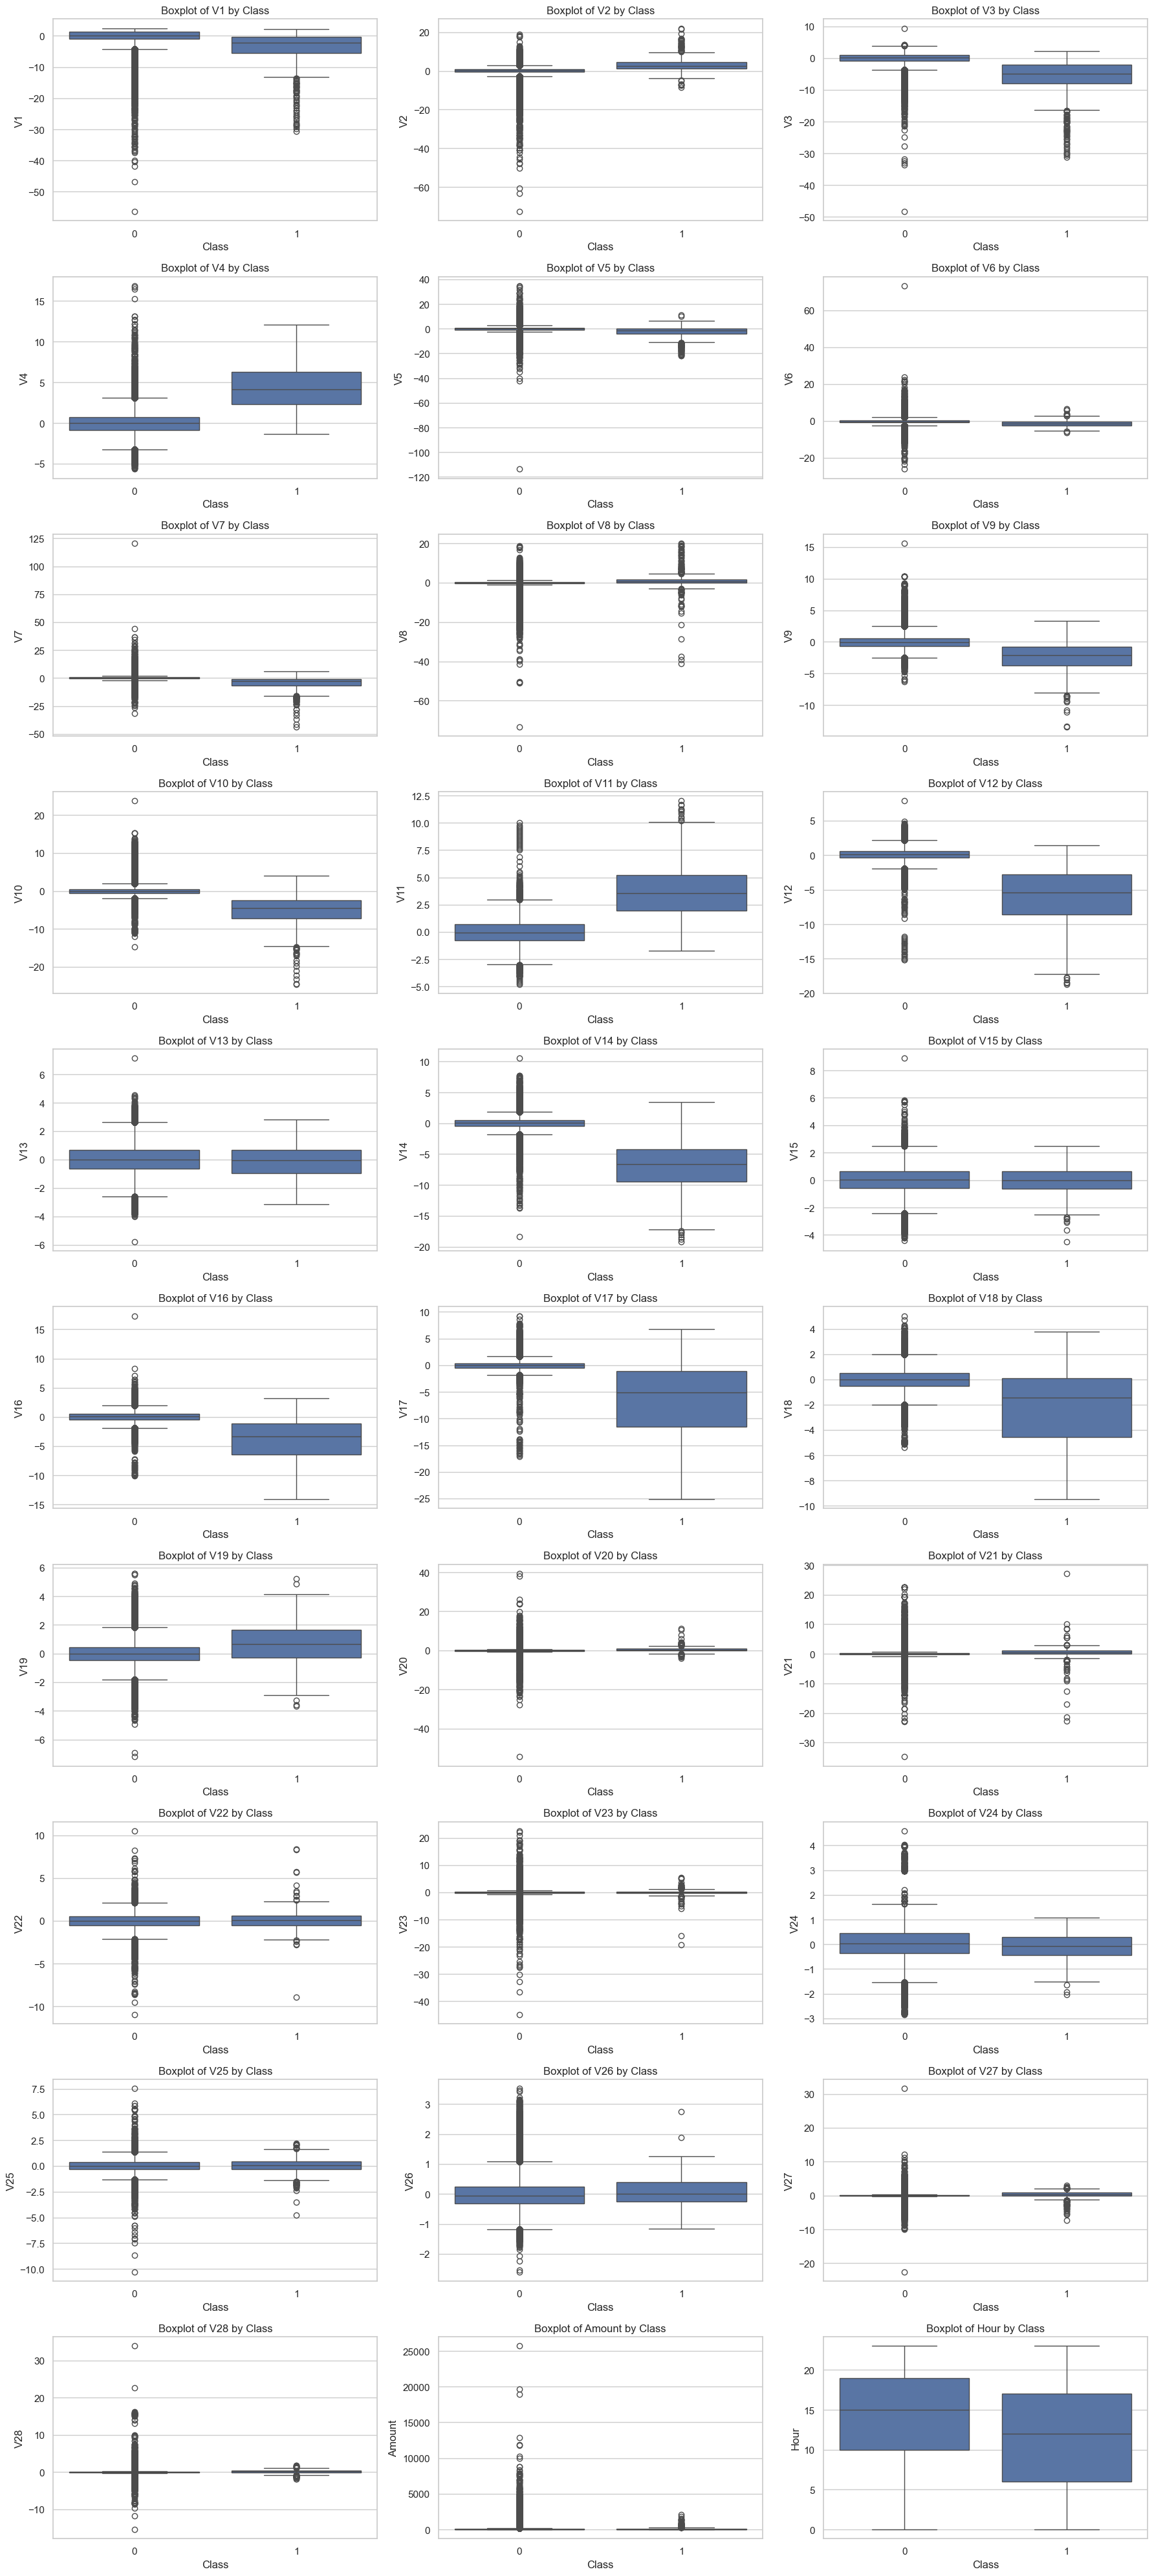

In [18]:
# Get all feature columns excluding 'Class'
feature_columns = [col for col in df.columns if col not in ['Class']]

# Set number of plots per row
plots_per_row = 3
num_features = len(feature_columns)
num_rows = int(np.ceil(num_features / plots_per_row))

plt.figure(figsize=(plots_per_row * 6, num_rows * 4))

for i, col in enumerate(feature_columns, 1):
    plt.subplot(num_rows, plots_per_row, i)
    sns.boxplot(x='Class', y=col, data=df)
    plt.title(f'Boxplot of {col} by Class')

plt.tight_layout()
plt.show()

##### D.  Correlation Heatmap

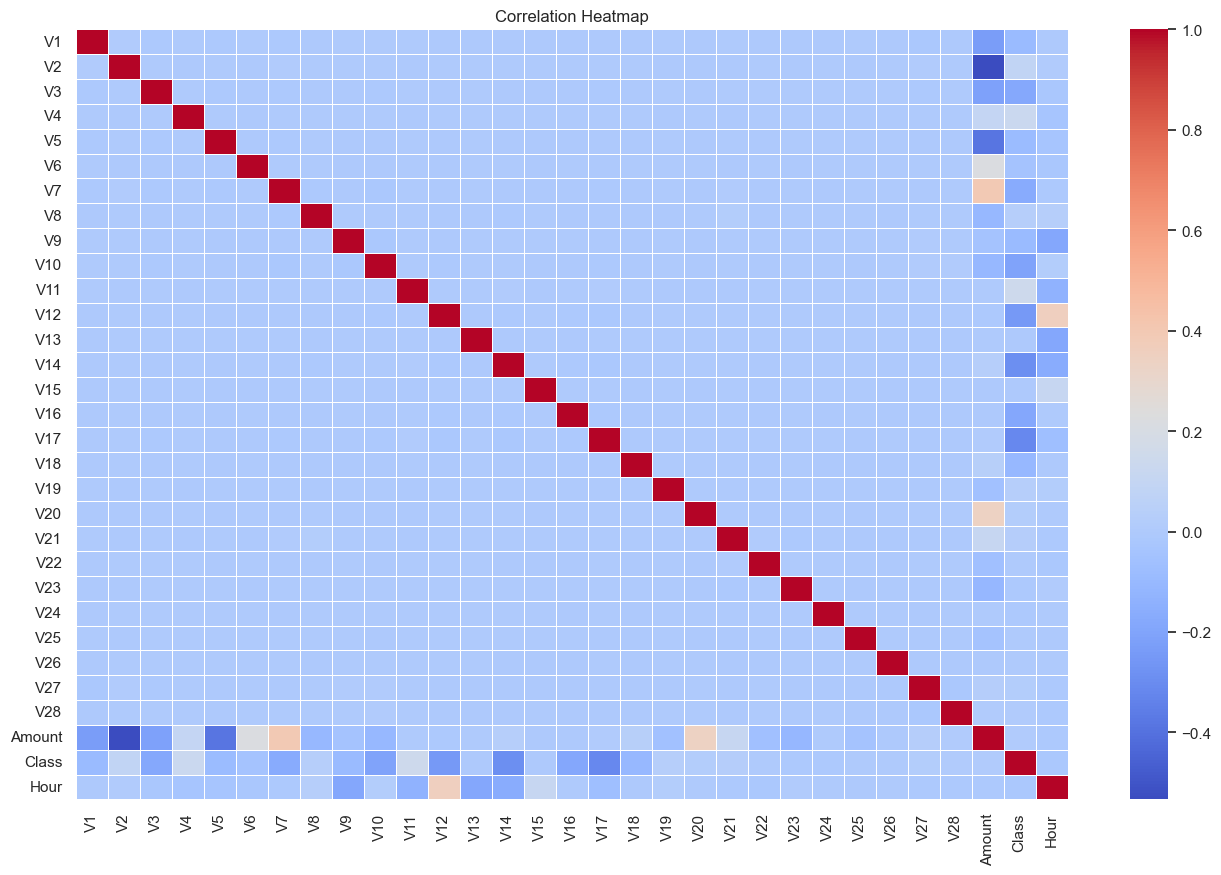

In [19]:
plt.figure(figsize=(16, 10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [20]:
# Check skewness of all numeric features
skew_vals = df.drop(columns=['Class']).skew().sort_values(ascending=False)
print(skew_vals)

Amount    16.978803
V28       11.555115
V7         2.890271
V21        2.820033
V6         1.829880
V10        1.252967
V4         0.671504
V26        0.580292
V9         0.537663
V11        0.344074
V19        0.108312
V13        0.064293
V22       -0.182330
V18       -0.248661
V15       -0.309659
V25       -0.415744
Hour      -0.490000
V24       -0.552129
V27       -0.753804
V16       -1.051161
V14       -1.918804
V20       -2.043121
V3        -2.151984
V12       -2.199008
V5        -2.414079
V1        -3.273271
V17       -3.690497
V2        -4.695162
V23       -5.867221
V8        -8.310970
dtype: float64


##### Summary of the results:
- Classes:
    - Severe imbalance (~0.17% fraud cases).
- Transaction Amount:
    - Highly skewed with lots of low-value transactions.
    - Outliers up to ~25,000+ — noticeable in boxplot.
- Transaction Amount by Class:
    - Fraudulent transactions seem to cluster in lower-to-mid range
    - Boxplot shows a few higher-value frauds, but far fewer than in non-fraud. This could indicate that fraud attempts are often not very large, possibly to avoid detection.
- Box plots:
    - V1, V2, V3, V4, V10, V11, V12, V14, V16, V17, V18 -> These might be strong signals for detecting fraud.
    - V4: Clear difference in median and range between classes.
    - V11 & V14: Wider spread for fraud cases — could indicate abnormal transactions.
    - V17: Especially distinct — possible key predictor!
- Corr matrix:
    - Most features (V1–V28) are uncorrelated with each other
    - Some features like V17, V14, and V12 show stronger correlation with Class (possibly useful predictors).
    - Amount and Log_Amount show weak negative correlation with Class.
- Data is not just skewed — it’s extremely skewed in both directions.

### Outliers

In [21]:
# Function to count outliers in each feature using IQR
def detect_outliers_iqr(df, features):
    outlier_counts = {}
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = df[(df[feature] < lower) | (df[feature] > upper)]
        outlier_counts[feature] = outliers.shape[0]
    return pd.Series(outlier_counts).sort_values(ascending=False)

# Apply to all numerical features except 'Class'
numeric_features = df.drop(columns=['Class']).select_dtypes(include=['float64', 'int64']).columns
outlier_summary = detect_outliers_iqr(df, numeric_features)
print(outlier_summary)


V27       38799
Amount    31685
V28       30094
V20       27553
V8        23904
V6        22886
V23       18467
V12       15282
V21       14401
V14       14060
V2        13390
V5        12221
V4        11094
V19       10150
V10        9345
V7         8839
V9         8199
V16        8180
V18        7468
V17        7353
V1         6948
V26        5665
V25        5333
V24        4758
V13        3362
V3         3306
V15        2884
V22        1298
V11         735
Hour          0
dtype: int64


In [22]:
# ---------------------------------------------------------
#  Feature Skewness Summary (Based on Skewness Values)
# ---------------------------------------------------------

# Highly Positively Skewed Features (Right-Skewed, Skewness > +1)
# - Amount: +16.98
# - V28: +11.56
# - V7:  +2.89
# - V21: +2.82
# - V6:  +1.83
# - V10: +1.25

# Highly Negatively Skewed Features (Left-Skewed, Skewness < -1)
# - V16: -1.05
# - V14: -1.91
# - V20: -2.04
# - V3:  -2.15
# - V12: -2.20
# - V5:  -2.41
# - V1:  -3.27
# - V17: -3.69
# - V2:  -4.70
# - V23: -5.87
# - V8:  -8.31

# Moderately/Low Skewed Features (Between -1 and +1)
# - V4, V9, V11, V13, V15, V18, V19, V22, V24, V25, V26
# - Time: ~0.00 (very symmetric)
# ---------------------------------------------------------


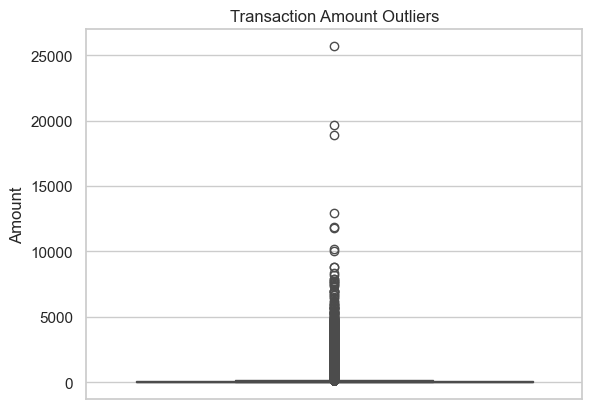

In [23]:
# Visualize extreme transaction amounts
sns.boxplot(data=df['Amount'])
plt.title("Transaction Amount Outliers")
plt.show()


Summary:
- This is fraud detection, and frauds are the outliers by nature.
- Some of the outliers might be the strongest signals for identifying fraud.
- Dropping them or capping them might cause your model to miss true fraud cases.
-  Features with Many Outliers (e.g., V27, Amount, V28):
    - These features show wide distributions and extreme values. In fraud detection, this is not a problem — in fact, it’s likely where the signal is. Especially Amount: big outliers could represent high-risk transactions.

---
---


## 2. Cluster Analysis
- Try to find hidden patterns in data with the help of unsupervised learning algorithms.

In [24]:
# Step 1: Prepare and scale the data
X = df.drop(columns=['Class'])
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
# Step 2: Set parameters
min_k = 2
max_k = 30
early_stop_rounds = 3
inertia_threshold = 0.01  # Minimum % drop required in inertia
best_score = -1
patience = 0
scores = []
inertia = []
k_used = []
prev_inertia = None

# Step 3: Clustering with combined early stopping
for k in range(min_k, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto', tol=1e-4)
    labels = kmeans.fit_predict(X_scaled)
    
    score = silhouette_score(X_scaled, labels)
    current_inertia = kmeans.inertia_

    scores.append(score)
    inertia.append(current_inertia)
    k_used.append(k)
    
    print(f"k={k}, silhouette={score:.4f}, inertia={current_inertia:.2e}")
    
    # Inertia drop (% change)
    if prev_inertia:
        inertia_drop = (prev_inertia - current_inertia) / prev_inertia
        print(f"    inertia drop: {inertia_drop:.4%}")
    else:
        inertia_drop = np.inf  # No comparison at k=2

    # Early stopping logic (combined)
    if score > best_score:
        best_score = score
        best_k = k
        patience = 0  # reset
    else:
        patience += 1

    if patience >= early_stop_rounds and inertia_drop < inertia_threshold:
        print(f"Early stopping at k={k} (no silhouette improvement for {early_stop_rounds} steps "
              f"and inertia drop < {inertia_threshold:.0%})")
        break

    prev_inertia = current_inertia

print(f"\nOptimal k estimated: {best_k} with silhouette score: {best_score:.4f}")


k=2, silhouette=0.6823, inertia=1.50e+07
k=3, silhouette=0.6779, inertia=1.44e+07
    inertia drop: 4.3682%
k=4, silhouette=0.4103, inertia=1.37e+07
    inertia drop: 4.3098%
k=5, silhouette=0.0975, inertia=1.33e+07
    inertia drop: 2.9921%
k=6, silhouette=0.1075, inertia=1.26e+07
    inertia drop: 5.7431%
k=7, silhouette=0.1039, inertia=1.24e+07
    inertia drop: 1.7183%
k=8, silhouette=0.1068, inertia=1.16e+07
    inertia drop: 6.4208%
k=9, silhouette=0.1089, inertia=1.12e+07
    inertia drop: 3.1095%
k=10, silhouette=0.1079, inertia=1.10e+07
    inertia drop: 1.7677%
k=11, silhouette=0.1068, inertia=1.08e+07
    inertia drop: 1.6435%
k=12, silhouette=0.0485, inertia=1.06e+07
    inertia drop: 1.7499%
k=13, silhouette=0.0591, inertia=1.04e+07
    inertia drop: 2.0404%
k=14, silhouette=0.0625, inertia=9.97e+06
    inertia drop: 4.3063%
k=15, silhouette=0.0709, inertia=9.72e+06
    inertia drop: 2.4668%
k=16, silhouette=0.0771, inertia=9.45e+06
    inertia drop: 2.7334%
k=17, silhouet

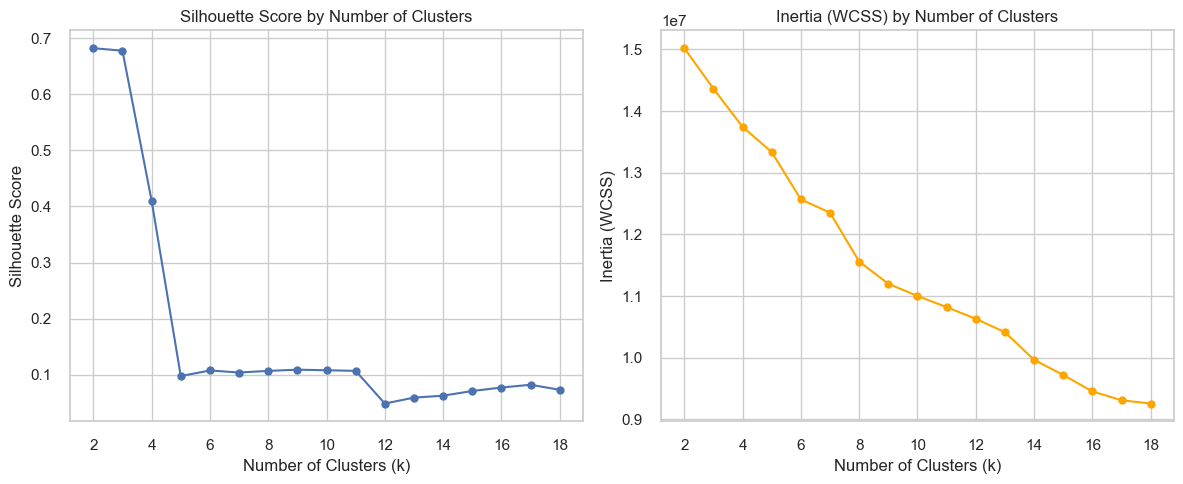

In [26]:
# Plot Silhouette Score vs. k
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_used, scores, marker='o')
plt.title('Silhouette Score by Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

# Plot Inertia vs. k (Elbow Method)
plt.subplot(1, 2, 2)
plt.plot(k_used, inertia, marker='o', color='orange')
plt.title('Inertia (WCSS) by Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.grid(True)

plt.tight_layout()
plt.show()

##### Summary:
We evaluated KMeans clustering with `k` values ranging from 2 to 18. The following metrics were used:

- **Silhouette Score**: Measures how well samples are clustered (higher is better).
- **Inertia (WCSS)**: Measures compactness of clusters (lower is better).


#### Silhouette Score Insights

- The **highest silhouette score** occurs at `k=2` (≈ **0.68**), followed closely by `k=3`.
- A sharp **drop in silhouette score** occurs after `k=3`, falling to **~0.4** at `k=4` and **~0.1 or less** beyond `k=5`.
- This indicates that **clusters become less distinct and well-separated** as `k` increases.


#### Inertia (WCSS) Insights

- Inertia **steadily decreases** with increasing `k`, as expected.
- The **rate of inertia improvement flattens** beyond `k=8–10`, suggesting diminishing returns from adding more clusters.
- However, this decrease is **not accompanied by meaningful silhouette score gains**, indicating the additional clusters do not represent truly separate structures.


#### Final Conclusion

- **Optimal k**: `k=2` is the strongest candidate based on both **high silhouette** and a clear **"elbow"** in the inertia curve.

In [ ]:
# choose the best fit of k which is in our case K=2
selected_k = 2

# Fit KMeans
kmeans = KMeans(n_clusters=selected_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['cluster'] = kmeans.fit_predict(X_scaled)

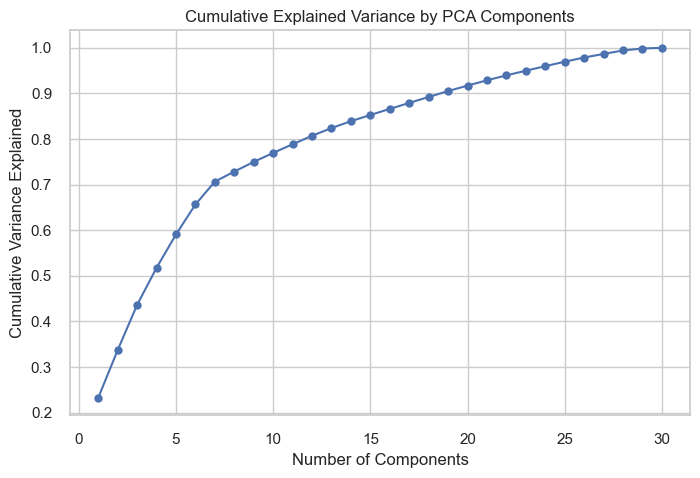

In [28]:
# Perform PCA on scaled data
pca = PCA()
X_pca_full = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# plot curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()

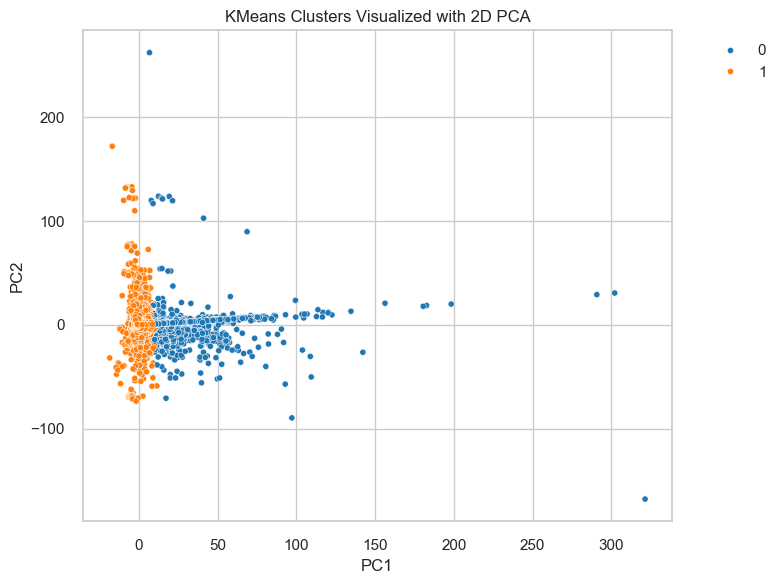

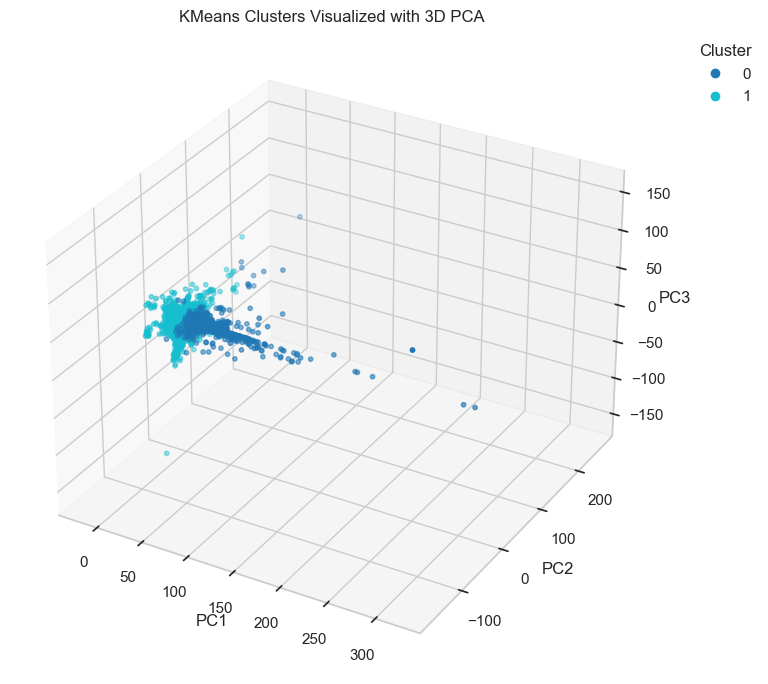

In [29]:
# Slice for 2D and 3D
X_pca_2d = X_pca_full[:, :2]
X_pca_3d = X_pca_full[:, :3]

# Create DataFrames for plotting
pca_df_2d = pd.DataFrame(X_pca_2d, columns=['PC1', 'PC2'])
pca_df_2d['cluster'] = clusters

pca_df_3d = pd.DataFrame(X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
pca_df_3d['cluster'] = clusters

# Plot 2D PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df_2d, x='PC1', y='PC2', hue='cluster', palette='tab10', s=20)
plt.title('KMeans Clusters Visualized with 2D PCA')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot 3D PCA
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    pca_df_3d['PC1'], pca_df_3d['PC2'], pca_df_3d['PC3'],
    c=pca_df_3d['cluster'], cmap='tab10', s=10
)

ax.set_title("KMeans Clusters Visualized with 3D PCA")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

plt.legend(*scatter.legend_elements(), title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### Analyze fraud distribution across these clusters:

In [30]:
pd.crosstab(clusters, df['Class'], normalize='index') * 100

Class,0,1
row_0,,
0,99.656095,0.343905
1,99.836620,0.163380


### Insight:

- Both clusters are **dominated by non-fraud cases**
- Only a **very small fraction of fraud cases** are grouped into either cluster
- **No cluster strongly captures fraud behavior**


In [31]:
# drop cluster column that we added for plotting cluster coloring
df.drop('cluster', axis=1, inplace=True)

In [32]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0


## 3. Data Preprocessing

#### Train - Test Split

In [24]:
# Step 1: Define features and target
X = df.drop(columns=['Class'])  # includes 'Amount' (not log-transformed), 'Hour', and other engineered features
y = df['Class']

# Step 2: Train-test split (stratified to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

## Train-Test Validation Checks
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_train_test_validation.html

In [25]:
from deepchecks.tabular import Dataset
from deepchecks.tabular.suites import train_test_validation

# Create Deepchecks Datasets
train_ds = Dataset(X_train, label=y_train, cat_features=[])
test_ds = Dataset(X_test, label=y_test, cat_features=[])

# Run the Train-Test Validation Suite
suite = train_test_validation()
suite_result = suite.run(train_ds, test_ds)

# Display results in notebook
suite_result.show()

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_12UA6GUUATNRMYD9HFITB88UX">Train Test Validat…

#### Scaling

In [26]:
# Step 3: Apply RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

---
---


## 4. Model Building
It was previously stated that you need to make class prediction with four different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset, we can use undersampling and oversampling or class weight and optimum thresold techniques.

##### ***Baseline***: 
lets train all those model without rebalancing the data and see how good they will be and focus on recall

In [27]:
# Logistic Regression (Baseline)
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)

# Predict
lr_preds = lr.predict(X_test_scaled)
lr_probs = lr.predict_proba(X_test_scaled)[:, 1]

# Evaluate
lr_report = classification_report(y_test, lr_preds, output_dict=True, zero_division=0)
lr_roc_auc = roc_auc_score(y_test, lr_probs)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_pr_auc = auc(lr_recall, lr_precision)

In [28]:
#  Random Forest (Baseline)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

rf_preds = rf.predict(X_test)
rf_probs = rf.predict_proba(X_test)[:, 1]

rf_report = classification_report(y_test, rf_preds, output_dict=True, zero_division=0)
rf_roc_auc = roc_auc_score(y_test, rf_probs)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probs)
rf_pr_auc = auc(rf_recall, rf_precision)

In [29]:
# XGBoost (Baseline)
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

xgb_preds = xgb.predict(X_test)
xgb_probs = xgb.predict_proba(X_test)[:, 1]

xgb_report = classification_report(y_test, xgb_preds, output_dict=True, zero_division=0)
xgb_roc_auc = roc_auc_score(y_test, xgb_probs)
xgb_precision, xgb_recall, _ = precision_recall_curve(y_test, xgb_probs)
xgb_pr_auc = auc(xgb_recall, xgb_precision)

In [30]:
#  Neural Network (Baseline)
# Define the model
nn_tf = models.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
nn_tf.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['Precision', 'Recall', 'AUC']
)

# Train the model
nn_tf.fit(
    X_train_scaled, y_train,
    epochs=10, batch_size=256,  # You can tune these
    validation_split=0.1,
    verbose=1
)

# Predict probabilities
nn_probs = nn_tf.predict(X_test_scaled).flatten()

# Predict class labels using threshold 0.5
nn_preds = (nn_probs >= 0.5).astype(int)

# Evaluate
nn_report = classification_report(y_test, nn_preds, output_dict=True, zero_division=0)
nn_roc_auc = roc_auc_score(y_test, nn_probs)
nn_precision, nn_recall, _ = precision_recall_curve(y_test, nn_probs)
nn_pr_auc = auc(nn_recall, nn_precision)


Epoch 1/10
798/798 ━━━━━━━━━━━━━━━━━━━━ 1s 651us/step - AUC: 0.5862 - Precision: 0.1447 - Recall: 0.2854 - loss: 0.0810 - val_AUC: 0.9126 - val_Precision: 0.8667 - val_Recall: 0.7429 - val_loss: 0.0042
Epoch 2/10
798/798 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - AUC: 0.9322 - Precision: 0.8897 - Recall: 0.7373 - loss: 0.0039 - val_AUC: 0.9411 - val_Precision: 0.8571 - val_Recall: 0.6857 - val_loss: 0.0034
Epoch 3/10
798/798 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - AUC: 0.9395 - Precision: 0.8672 - Recall: 0.7186 - loss: 0.0034 - val_AUC: 0.9280 - val_Precision: 0.8966 - val_Recall: 0.7429 - val_loss: 0.0030
Epoch 4/10
798/798 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - AUC: 0.9560 - Precision: 0.9070 - Recall: 0.7947 - loss: 0.0023 - val_AUC: 0.9281 - val_Precision: 0.9000 - val_Recall: 0.7714 - val_loss: 0.0030
Epoch 5/10
798/798 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - AUC: 0.9483 - Precision: 0.9253 - Recall: 0.7711 - loss: 0.0024 - val_AUC: 0.9421 - val_Precision: 0.7941 - val_Recall: 0.7714 - val_los

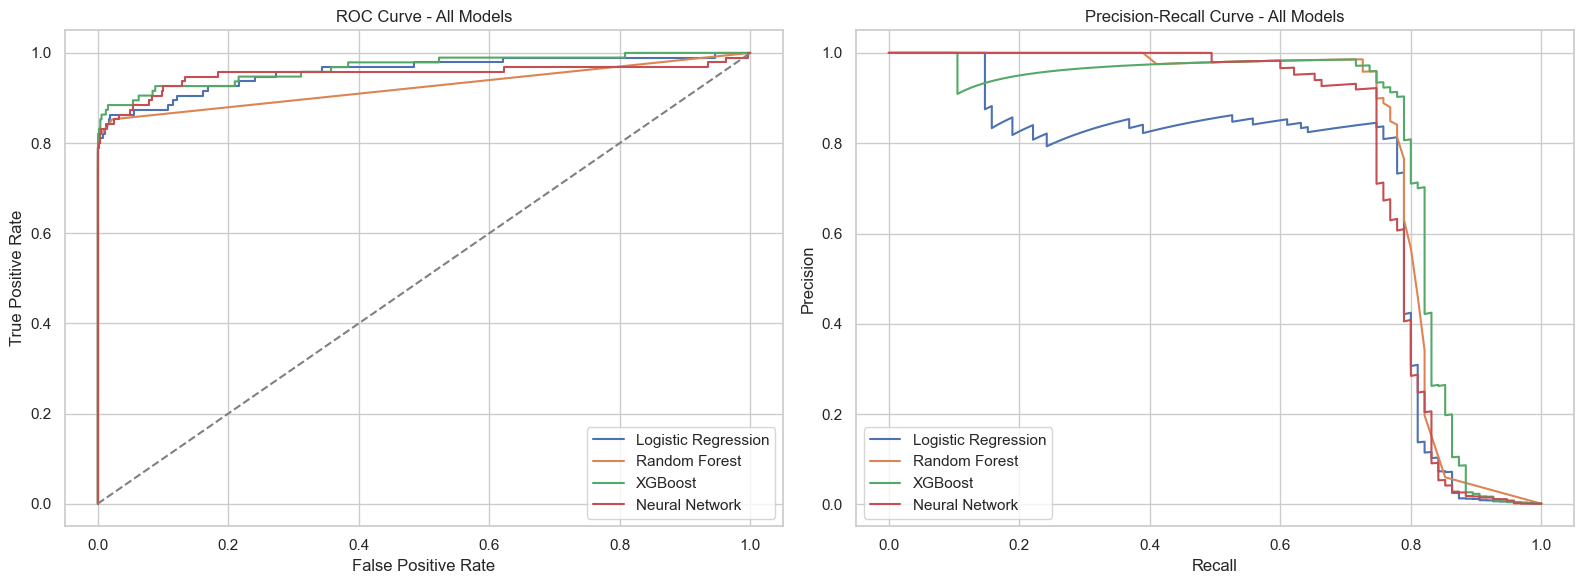

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- ROC Curve ---
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)
fpr_nn, tpr_nn, _ = roc_curve(y_test, nn_probs)

axes[0].plot(fpr_lr, tpr_lr, label='Logistic Regression')
axes[0].plot(fpr_rf, tpr_rf, label='Random Forest')
axes[0].plot(fpr_xgb, tpr_xgb, label='XGBoost')
axes[0].plot(fpr_nn, tpr_nn, label='Neural Network')
axes[0].plot([0, 1], [0, 1], linestyle='--', color='gray')

axes[0].set_title('ROC Curve - All Models')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].legend()
axes[0].grid(True)

# --- Precision-Recall Curve ---
axes[1].plot(lr_recall, lr_precision, label='Logistic Regression')
axes[1].plot(rf_recall, rf_precision, label='Random Forest')
axes[1].plot(xgb_recall, xgb_precision, label='XGBoost')
axes[1].plot(nn_recall, nn_precision, label='Neural Network')

axes[1].set_title('Precision-Recall Curve - All Models')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


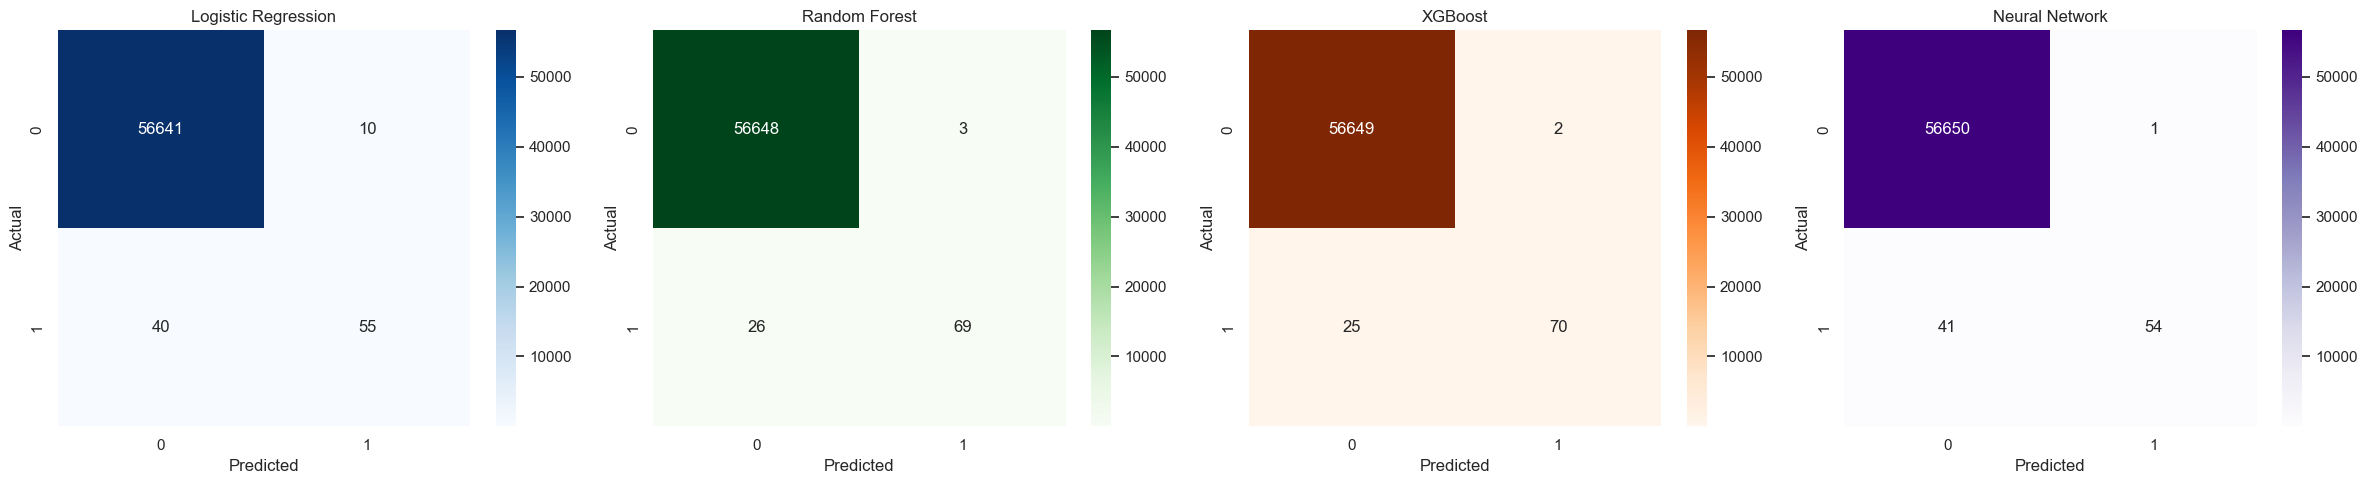

In [32]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(1, 4, figsize=(24, 5))

# Logistic Regression
sns.heatmap(confusion_matrix(y_test, lr_preds), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Random Forest
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Random Forest")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

# XGBoost
sns.heatmap(confusion_matrix(y_test, xgb_preds), annot=True, fmt='d', cmap='Oranges', ax=axes[2])
axes[2].set_title("XGBoost")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

# Neural Network
sns.heatmap(confusion_matrix(y_test, nn_preds), annot=True, fmt='d', cmap='Purples', ax=axes[3])
axes[3].set_title("Neural Network")
axes[3].set_xlabel("Predicted")
axes[3].set_ylabel("Actual")

plt.tight_layout()
plt.show()


In [33]:
import pandas as pd

summary_df = pd.DataFrame([
    {
        'Model': 'Logistic Regression',
        'Recall (Fraud)': round(lr_report['1']['recall'], 4),
        'Precision (Fraud)': round(lr_report['1']['precision'], 4),
        'F1-Score (Fraud)': round(lr_report['1']['f1-score'], 4),
        'ROC AUC': round(lr_roc_auc, 4),
        'PR AUC': round(lr_pr_auc, 4)
    },
    {
        'Model': 'Random Forest',
        'Recall (Fraud)': round(rf_report['1']['recall'], 4),
        'Precision (Fraud)': round(rf_report['1']['precision'], 4),
        'F1-Score (Fraud)': round(rf_report['1']['f1-score'], 4),
        'ROC AUC': round(rf_roc_auc, 4),
        'PR AUC': round(rf_pr_auc, 4)
    },
    {
        'Model': 'XGBoost',
        'Recall (Fraud)': round(xgb_report['1']['recall'], 4),
        'Precision (Fraud)': round(xgb_report['1']['precision'], 4),
        'F1-Score (Fraud)': round(xgb_report['1']['f1-score'], 4),
        'ROC AUC': round(xgb_roc_auc, 4),
        'PR AUC': round(xgb_pr_auc, 4)
    },
    {
        'Model': 'Neural Network',
        'Recall (Fraud)': round(nn_report['1']['recall'], 4),
        'Precision (Fraud)': round(nn_report['1']['precision'], 4),
        'F1-Score (Fraud)': round(nn_report['1']['f1-score'], 4),
        'ROC AUC': round(nn_roc_auc, 4),
        'PR AUC': round(nn_pr_auc, 4)
    }
])

# Display as styled table
summary_df.style.set_caption("Model Performance Summary (Baseline, Unbalanced Data)")


,Model,Recall (Fraud),Precision (Fraud),F1-Score (Fraud),ROC AUC,PR AUC
0,Logistic Regression,0.578900,0.846200,0.687500,0.958500,0.697900
1,Random Forest,0.726300,0.958300,0.826300,0.924200,0.800900
2,XGBoost,0.736800,0.972200,0.838300,0.966900,0.804400
3,Neural Network,0.568400,0.981800,0.720000,0.952400,0.779700


##### ***using class_weight:***

In [34]:
#  Logistic Regression with class_weight='balanced'

lr_balanced = LogisticRegression(class_weight='balanced', max_iter=1000)
lr_balanced.fit(X_train_scaled, y_train)

lr_probs = lr_balanced.predict_proba(X_test_scaled)[:, 1]
lr_preds = (lr_probs >= 0.5).astype(int)

lr_report = classification_report(y_test, lr_preds, output_dict=True, zero_division=0)
lr_roc_auc = roc_auc_score(y_test, lr_probs)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_pr_auc = auc(lr_recall, lr_precision)

In [35]:
#  Random Forest with Class Weights

rf_balanced = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_balanced.fit(X_train, y_train)

rf_probs = rf_balanced.predict_proba(X_test)[:, 1]
rf_preds = (rf_probs >= 0.5).astype(int)

rf_report = classification_report(y_test, rf_preds, output_dict=True, zero_division=0)
rf_roc_auc = roc_auc_score(y_test, rf_probs)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probs)
rf_pr_auc = auc(rf_recall, rf_precision)


In [36]:
# XGBoost with scale_pos_weight

# scale_pos_weight = (negative / positive)
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb_balanced = XGBClassifier(eval_metric='logloss',
                             scale_pos_weight=scale_pos_weight, random_state=42)
xgb_balanced.fit(X_train, y_train)

xgb_probs = xgb_balanced.predict_proba(X_test)[:, 1]
xgb_preds = (xgb_probs >= 0.5).astype(int)

xgb_report = classification_report(y_test, xgb_preds, output_dict=True, zero_division=0)
xgb_roc_auc = roc_auc_score(y_test, xgb_probs)
xgb_precision, xgb_recall, _ = precision_recall_curve(y_test, xgb_probs)
xgb_pr_auc = auc(xgb_recall, xgb_precision)

In [37]:
#  Neural Network (TensorFlow) with Class Weights

# Compute class weights for binary classification
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = dict(enumerate(class_weights))

nn_balanced = models.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

nn_balanced.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['Precision', 'Recall', 'AUC']
)

nn_balanced.fit(
    X_train_scaled, y_train,
    epochs=10, batch_size=256,
    validation_split=0.1,
    class_weight=class_weights_dict,
    verbose=1
)

nn_probs = nn_balanced.predict(X_test_scaled).flatten()
nn_preds = (nn_probs >= 0.5).astype(int)

nn_report = classification_report(y_test, nn_preds, output_dict=True, zero_division=0)
nn_roc_auc = roc_auc_score(y_test, nn_probs)
nn_precision, nn_recall, _ = precision_recall_curve(y_test, nn_probs)
nn_pr_auc = auc(nn_recall, nn_precision)


Epoch 1/10
798/798 ━━━━━━━━━━━━━━━━━━━━ 1s 751us/step - AUC: 0.8604 - Precision: 0.0304 - Recall: 0.7359 - loss: 0.3443 - val_AUC: 0.9642 - val_Precision: 0.0680 - val_Recall: 0.9429 - val_loss: 0.1278
Epoch 2/10
798/798 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - AUC: 0.9845 - Precision: 0.0621 - Recall: 0.8978 - loss: 0.1565 - val_AUC: 0.9604 - val_Precision: 0.0354 - val_Recall: 0.8857 - val_loss: 0.1369
Epoch 3/10
798/798 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - AUC: 0.9925 - Precision: 0.0578 - Recall: 0.9368 - loss: 0.1100 - val_AUC: 0.9648 - val_Precision: 0.0745 - val_Recall: 0.8857 - val_loss: 0.0675
Epoch 4/10
798/798 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - AUC: 0.9887 - Precision: 0.0750 - Recall: 0.9554 - loss: 0.0892 - val_AUC: 0.9598 - val_Precision: 0.0297 - val_Recall: 0.9143 - val_loss: 0.1361
Epoch 5/10
798/798 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - AUC: 0.9899 - Precision: 0.0495 - Recall: 0.9516 - loss: 0.0843 - val_AUC: 0.9663 - val_Precision: 0.0881 - val_Recall: 0.8857 - val_los

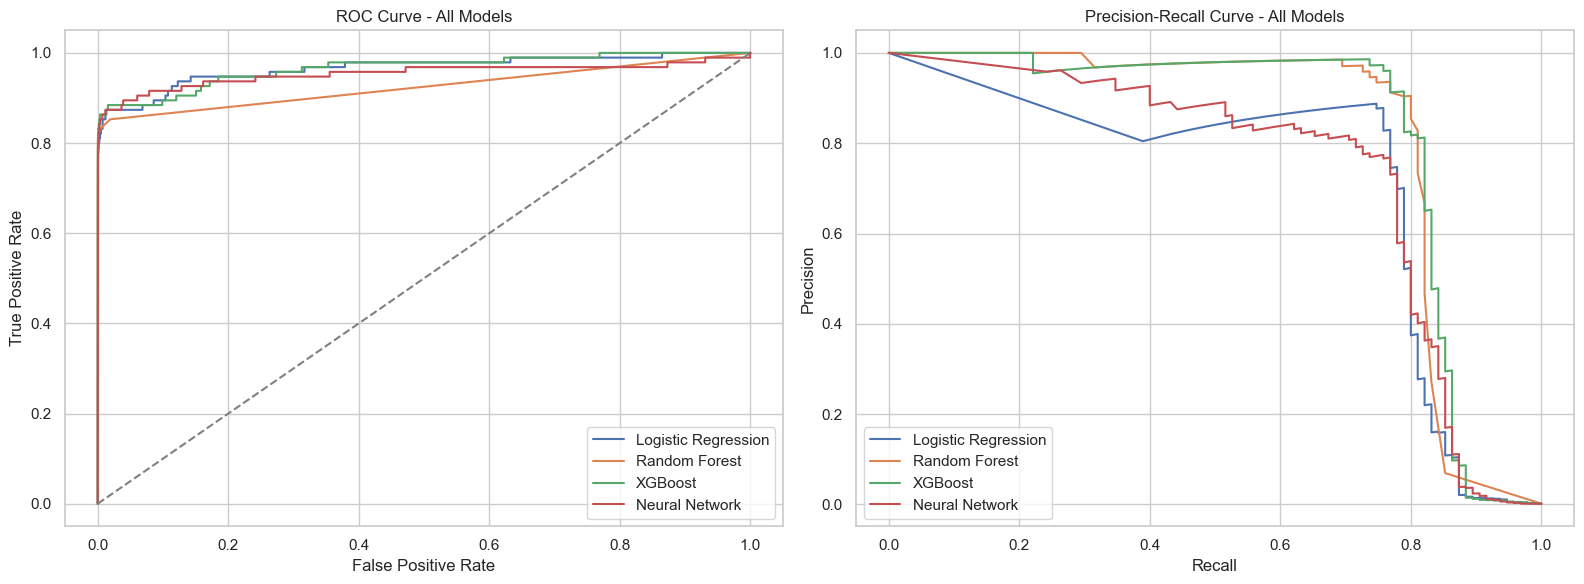

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- ROC Curve ---
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)
fpr_nn, tpr_nn, _ = roc_curve(y_test, nn_probs)

axes[0].plot(fpr_lr, tpr_lr, label='Logistic Regression')
axes[0].plot(fpr_rf, tpr_rf, label='Random Forest')
axes[0].plot(fpr_xgb, tpr_xgb, label='XGBoost')
axes[0].plot(fpr_nn, tpr_nn, label='Neural Network')
axes[0].plot([0, 1], [0, 1], linestyle='--', color='gray')

axes[0].set_title('ROC Curve - All Models')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].legend()
axes[0].grid(True)

# --- Precision-Recall Curve ---
axes[1].plot(lr_recall, lr_precision, label='Logistic Regression')
axes[1].plot(rf_recall, rf_precision, label='Random Forest')
axes[1].plot(xgb_recall, xgb_precision, label='XGBoost')
axes[1].plot(nn_recall, nn_precision, label='Neural Network')

axes[1].set_title('Precision-Recall Curve - All Models')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

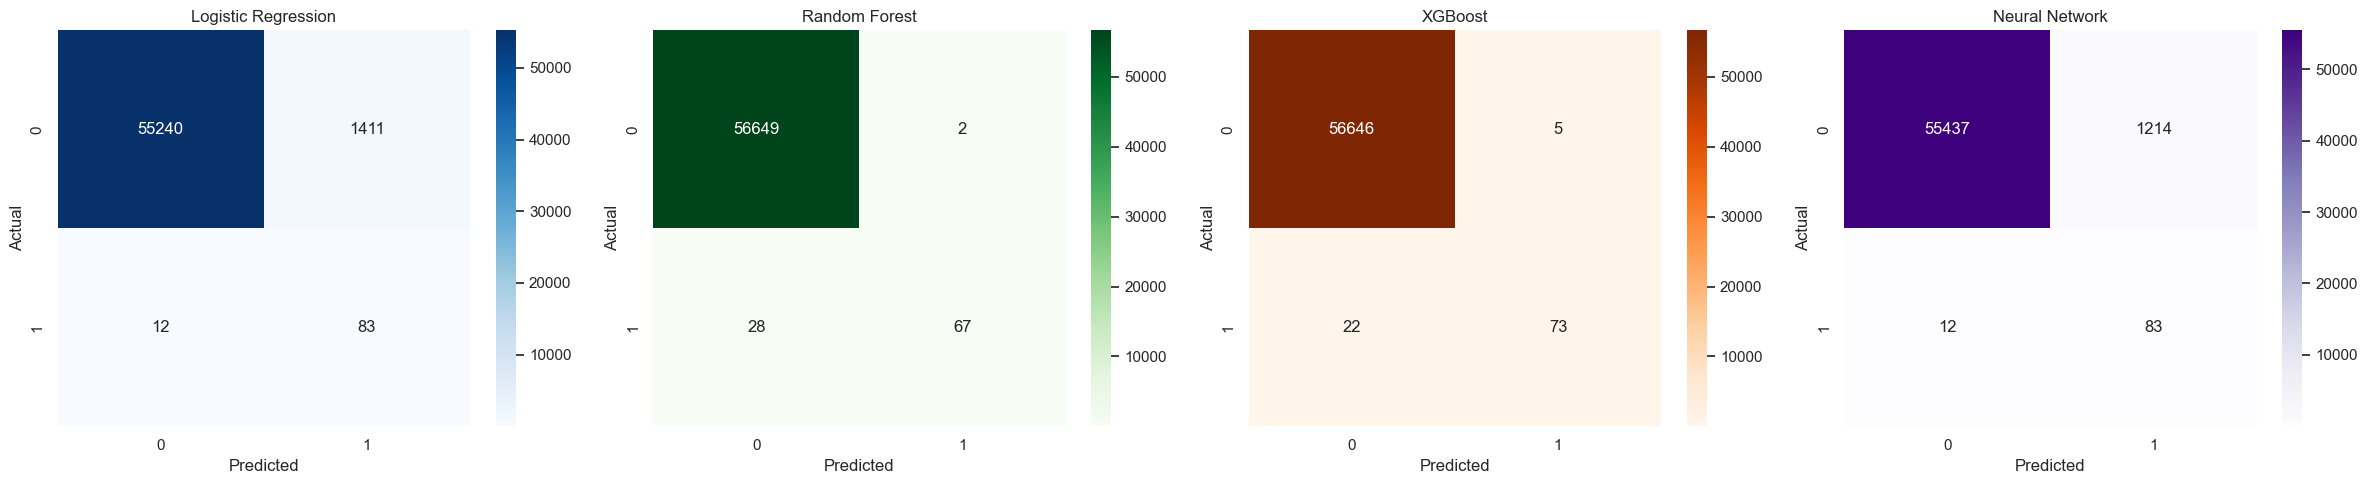

In [39]:
fig, axes = plt.subplots(1, 4, figsize=(24, 5))

# Logistic Regression
sns.heatmap(confusion_matrix(y_test, lr_preds), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Random Forest
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Random Forest")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

# XGBoost
sns.heatmap(confusion_matrix(y_test, xgb_preds), annot=True, fmt='d', cmap='Oranges', ax=axes[2])
axes[2].set_title("XGBoost")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

# Neural Network
sns.heatmap(confusion_matrix(y_test, nn_preds), annot=True, fmt='d', cmap='Purples', ax=axes[3])
axes[3].set_title("Neural Network")
axes[3].set_xlabel("Predicted")
axes[3].set_ylabel("Actual")

plt.tight_layout()
plt.show()


In [40]:
import pandas as pd

summary_df = pd.DataFrame([
    {
        'Model': 'Logistic Regression',
        'Recall (Fraud)': round(lr_report['1']['recall'], 4),
        'Precision (Fraud)': round(lr_report['1']['precision'], 4),
        'F1-Score (Fraud)': round(lr_report['1']['f1-score'], 4),
        'ROC AUC': round(lr_roc_auc, 4),
        'PR AUC': round(lr_pr_auc, 4)
    },
    {
        'Model': 'Random Forest',
        'Recall (Fraud)': round(rf_report['1']['recall'], 4),
        'Precision (Fraud)': round(rf_report['1']['precision'], 4),
        'F1-Score (Fraud)': round(rf_report['1']['f1-score'], 4),
        'ROC AUC': round(rf_roc_auc, 4),
        'PR AUC': round(rf_pr_auc, 4)
    },
    {
        'Model': 'XGBoost',
        'Recall (Fraud)': round(xgb_report['1']['recall'], 4),
        'Precision (Fraud)': round(xgb_report['1']['precision'], 4),
        'F1-Score (Fraud)': round(xgb_report['1']['f1-score'], 4),
        'ROC AUC': round(xgb_roc_auc, 4),
        'PR AUC': round(xgb_pr_auc, 4)
    },
    {
        'Model': 'Neural Network',
        'Recall (Fraud)': round(nn_report['1']['recall'], 4),
        'Precision (Fraud)': round(nn_report['1']['precision'], 4),
        'F1-Score (Fraud)': round(nn_report['1']['f1-score'], 4),
        'ROC AUC': round(nn_roc_auc, 4),
        'PR AUC': round(nn_pr_auc, 4)
    }
])

# Display as styled table
summary_df.style.set_caption("Model Performance Summary (with class weight)")


,Model,Recall (Fraud),Precision (Fraud),F1-Score (Fraud),ROC AUC,PR AUC
0,Logistic Regression,0.873700,0.055600,0.104500,0.965700,0.711600
1,Random Forest,0.705300,0.971000,0.817100,0.924600,0.814200
2,XGBoost,0.768400,0.935900,0.843900,0.965700,0.821900
3,Neural Network,0.873700,0.064000,0.119300,0.953500,0.737400


##### ***Hyperparameter Tuning and class_weight:***

In [41]:
# ---------------------------
# 1. logistic regression Tuning
# ---------------------------
lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],  # 'l1' may require solver='liblinear'
    'solver': ['lbfgs', 'liblinear'],
    'class_weight': ['balanced']
}

lr_grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    lr_params,
    scoring='recall',
    cv=3,
    n_jobs=-1
)
lr_grid.fit(X_train_scaled, y_train)
best_lr = lr_grid.best_estimator_


In [42]:
# ---------------------------
# 2. Random Forest Tuning
# ---------------------------

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced']
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_params,
    scoring='recall',
    cv=3,
    n_jobs=-1
)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_


In [43]:
# ---------------------------
# 3. xgb Tuning
# ---------------------------
def get_xgb_model():
    return XGBClassifier(eval_metric='logloss', random_state=42)

xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'scale_pos_weight': [10, 50, 100]
}

xgb_grid = GridSearchCV(
    estimator=get_xgb_model(),
    param_grid=xgb_params,
    scoring='recall',
    cv=3,
    n_jobs=-1
)

xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_

In [44]:
# ---------------------------
# 4. NN Tuning
# ---------------------------
# class_weights = class_weight.compute_class_weight(
#     class_weight='balanced',
#     classes=np.unique(y_train),
#     y=y_train
# )
# class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

class_weights_dict = {0: 1.0, 1: 5.0}

def build_nn_model(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train_scaled.shape[1],)))
    
    for i in range(hp.Int("layers", 1, 3)):
        model.add(layers.Dense(units=hp.Int(f"units_{i}", 32, 128, step=32), activation='relu'))
        model.add(layers.Dropout(rate=hp.Float(f"dropout_{i}", 0.1, 0.5, step=0.1)))

    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=[keras.metrics.Recall(name="recall")]
    )
    return model

tuner = kt.RandomSearch(
    build_nn_model,
    objective='val_recall',
    max_trials=10,
    directory='tuner_dir',
    project_name='nn_fraud_tuning'
)

tuner.search(X_train_scaled, y_train, validation_split=0.2, epochs=20, class_weight=class_weights_dict)
best_nn = tuner.get_best_models(1)[0]


Reloading Tuner from tuner_dir/nn_fraud_tuning/tuner0.json


1774/1774 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step


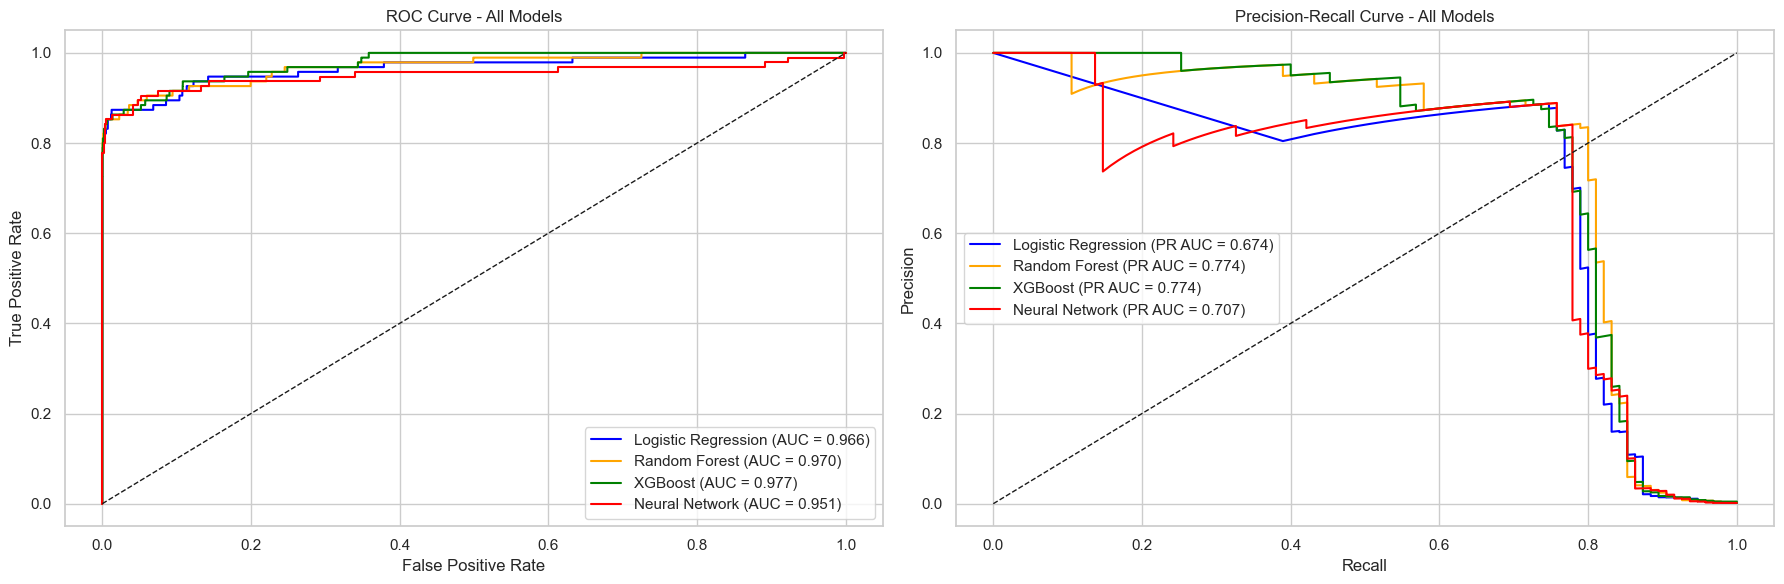

In [45]:
# Get predicted probabilities
y_pred_lr = best_lr.predict_proba(X_test_scaled)[:, 1]
y_pred_rf = best_rf.predict_proba(X_test)[:, 1]
y_pred_xgb = best_xgb.predict_proba(X_test)[:, 1]
y_pred_nn = best_nn.predict(X_test_scaled).ravel()

# Compute ROC and PR data
models_preds = {
    'Logistic Regression': y_pred_lr,
    'Random Forest': y_pred_rf,
    'XGBoost': y_pred_xgb,
    'Neural Network': y_pred_nn
}

# Set up plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Colors for consistency
colors = {
    'Logistic Regression': 'blue',
    'Random Forest': 'orange',
    'XGBoost': 'green',
    'Neural Network': 'red'
}

# Plot ROC and PR curves
for name, preds in models_preds.items():
    fpr, tpr, _ = roc_curve(y_test, preds)
    precision, recall, _ = precision_recall_curve(y_test, preds)
    roc_auc = roc_auc_score(y_test, preds)
    pr_auc = average_precision_score(y_test, preds)

    ax1.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})", color=colors[name])
    ax2.plot(recall, precision, label=f"{name} (PR AUC = {pr_auc:.3f})", color=colors[name])

# Final touches
ax1.plot([0, 1], [0, 1], 'k--', linewidth=1)
ax1.set_title("ROC Curve - All Models")
ax1.set_xlabel("False Positive Rate")
ax1.set_ylabel("True Positive Rate")
ax1.legend()

ax2.plot([0, 1], [0, 1], 'k--', linewidth=1)
ax2.set_title("Precision-Recall Curve - All Models")
ax2.set_xlabel("Recall")
ax2.set_ylabel("Precision")
ax2.legend()

plt.tight_layout()
plt.show()


1774/1774 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step


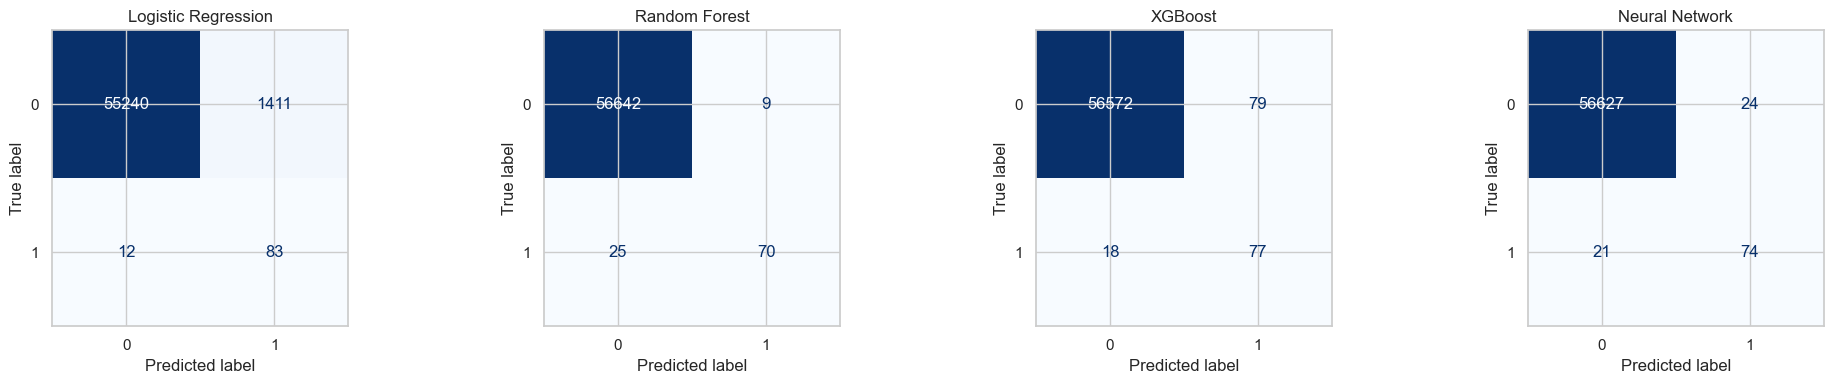

In [46]:
# Generate predictions for each model using the 0.5 threshold
y_pred_lr = (best_lr.predict_proba(X_test_scaled)[:, 1] > 0.5).astype(int)
y_pred_rf = (best_rf.predict_proba(X_test)[:, 1] > 0.5).astype(int)
y_pred_xgb = (best_xgb.predict_proba(X_test)[:, 1] > 0.5).astype(int)
y_pred_nn = (best_nn.predict(X_test_scaled).ravel() > 0.5).astype(int)

# Collect predictions in a dictionary
model_preds = {
    "Logistic Regression": y_pred_lr,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb,
    "Neural Network": y_pred_nn
}

# Plot confusion matrices side by side
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
for ax, (name, preds) in zip(axes, model_preds.items()):
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, colorbar=False, cmap='Blues')
    ax.set_title(name)

plt.tight_layout()
plt.show()


In [47]:
# Evaluate model predictions and collect metrics
summary_data = []

model_outputs = {
    "Logistic Regression": (y_test, y_pred_lr, best_lr.predict_proba(X_test_scaled)[:, 1]),
    "Random Forest": (y_test, y_pred_rf, best_rf.predict_proba(X_test)[:, 1]),
    "XGBoost": (y_test, y_pred_xgb, best_xgb.predict_proba(X_test)[:, 1]),
    "Neural Network": (y_test, y_pred_nn, best_nn.predict(X_test_scaled).ravel())
}

for model_name, (y_true, y_pred, y_proba) in model_outputs.items():
    report = classification_report(y_true, y_pred, output_dict=True, zero_division=0)
    precision, recall, _ = precision_recall_curve(y_true, y_proba)
    pr_auc = average_precision_score(y_true, y_proba)
    roc_auc = roc_auc_score(y_true, y_proba)

    summary_data.append({
        "Model": model_name,
        "Recall (Fraud)": round(report["1"]["recall"], 4),
        "Precision (Fraud)": round(report["1"]["precision"], 4),
        "F1-Score (Fraud)": round(report["1"]["f1-score"], 4),
        "ROC AUC": round(roc_auc, 4),
        "PR AUC": round(pr_auc, 4)
    })

# Create DataFrame
summary_df = pd.DataFrame(summary_data)

# Display styled table
summary_df = summary_df.sort_values(by="Recall (Fraud)", ascending=False)
summary_df.style.set_caption("Tuned Model Performance Summary") \
    .format(precision=4) \
    .set_table_styles([{"selector": "caption", "props": [("font-size", "16px"), ("font-weight", "bold")]}])


1774/1774 ━━━━━━━━━━━━━━━━━━━━ 0s 214us/step


,Model,Recall (Fraud),Precision (Fraud),F1-Score (Fraud),ROC AUC,PR AUC
0,Logistic Regression,0.8737,0.0556,0.1045,0.9657,0.6744
2,XGBoost,0.8105,0.4936,0.6135,0.9766,0.7735
3,Neural Network,0.7789,0.7551,0.7668,0.9512,0.7065
1,Random Forest,0.7368,0.8861,0.8046,0.9696,0.7735


##### ***Train on Over-sampled Data:***

In [48]:
# Step 1: Apply SMOTE on training data
print("Original class distribution:", Counter(y_train))

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("New class distribution after SMOTE:", Counter(y_train_smote))


Original class distribution: Counter({0: 226602, 1: 378})
New class distribution after SMOTE: Counter({0: 226602, 1: 226602})


In [49]:
# Step 2: Scale after SMOTE
scaler_smote = RobustScaler()
X_train_smote_scaled = scaler_smote.fit_transform(X_train_smote)
X_test_smote_scaled = scaler_smote.transform(X_test)

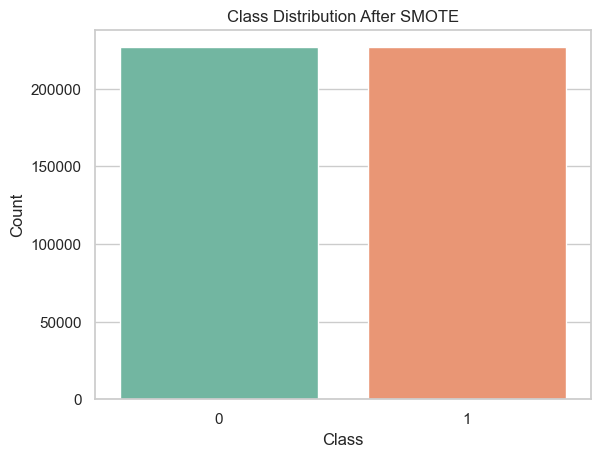

Class distribution after SMOTE: Counter({0: 226602, 1: 226602})


In [50]:
# Plot bar chart
sns.countplot(x=y_train_smote, palette='Set2')
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.grid(True, axis='y')
plt.show()

# Print actual counts
print("Class distribution after SMOTE:", Counter(y_train_smote))

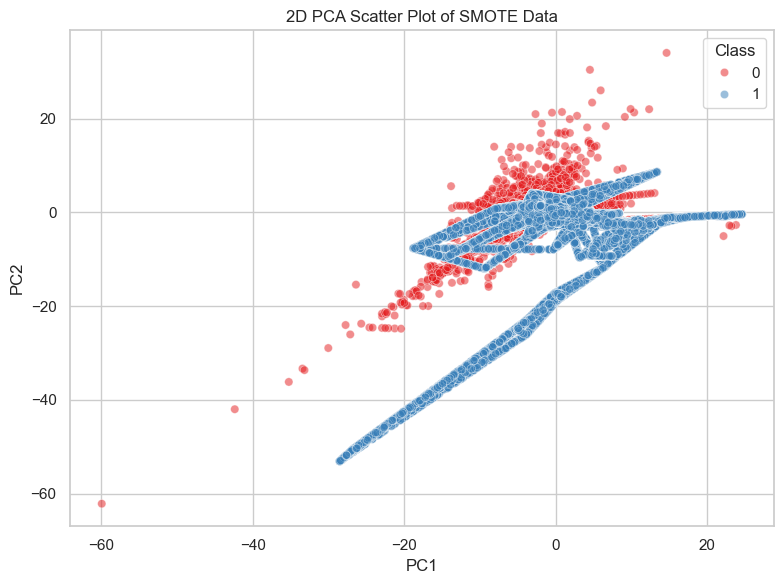

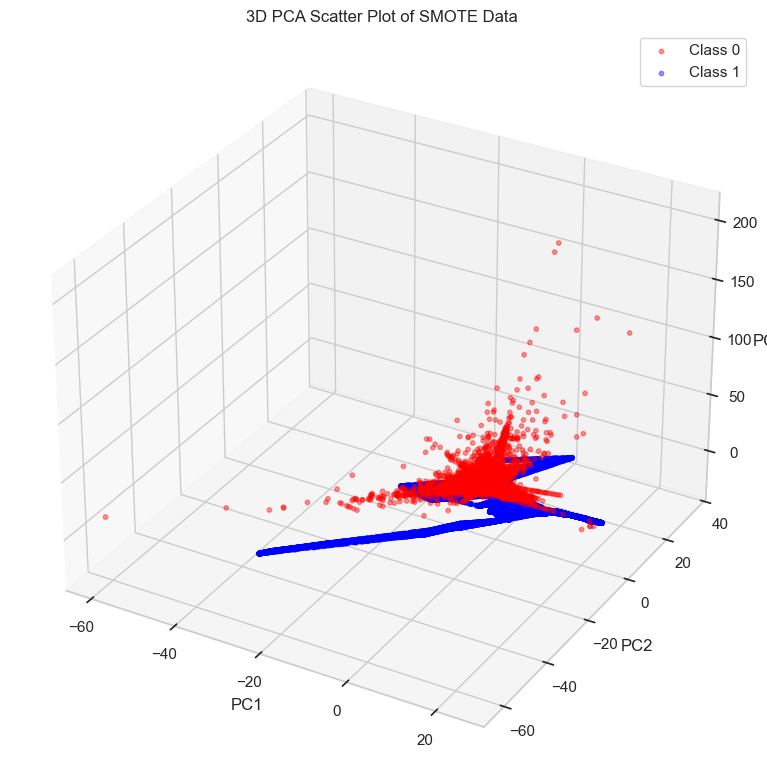

In [51]:
# Apply PCA once with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_train_smote_scaled)

# Create DataFrames for 2D and 3D plots
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2", "PC3"])
df_pca["Class"] = y_train_smote

# --- 2D PCA Plot ---
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Class", palette="Set1", alpha=0.5)
plt.title("2D PCA Scatter Plot of SMOTE Data")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 3D PCA Plot ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors = {0: 'red', 1: 'blue'}

for label in df_pca['Class'].unique():
    subset = df_pca[df_pca['Class'] == label]
    ax.scatter(subset["PC1"], subset["PC2"], subset["PC3"],
               label=f"Class {label}", alpha=0.4, s=10, color=colors[label])

ax.set_title("3D PCA Scatter Plot of SMOTE Data")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.legend()
plt.tight_layout()
plt.show()

In [52]:
# ---------------------------
# logistic regression SMOTE
# ---------------------------
lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2']
}
lr_grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid=lr_params,
    scoring='recall',
    cv=3,
    n_jobs=-1
)
lr_grid.fit(X_train_smote_scaled, y_train_smote)
best_lr_smote = lr_grid.best_estimator_

In [53]:
# ---------------------------
# Random Forest SMOTE
# ---------------------------
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=rf_params,
    scoring='recall',
    cv=3,
    n_jobs=-1
)
rf_grid.fit(X_train_smote_scaled, y_train_smote)
best_rf_smote = rf_grid.best_estimator_

In [54]:
# ---------------------------
# XGBoost SMOTE
# ---------------------------
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1]
}
xgb_grid = GridSearchCV(
    XGBClassifier(eval_metric='logloss', random_state=42),
    param_grid=xgb_params,
    scoring='recall',
    cv=3,
    n_jobs=-1
)
xgb_grid.fit(X_train_smote_scaled, y_train_smote)
best_xgb_smote = xgb_grid.best_estimator_

In [55]:
# ---------------------------
# Neural Network with KerasTuner SMOTE
# ---------------------------
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train_smote_scaled.shape[1],)))
    for i in range(hp.Int("layers", 1, 3)):
        model.add(layers.Dense(units=hp.Int(f"units_{i}", 32, 128, step=32), activation='relu'))
        model.add(layers.Dropout(rate=hp.Float(f"dropout_{i}", 0.1, 0.5, step=0.1)))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=[keras.metrics.Recall(name='recall')]
    )
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_recall',
    max_trials=10,
    directory='keras_tuner_smote',
    project_name='fraud_nn_smote',
    overwrite=True
)

tuner.search(
    X_train_smote_scaled,
    y_train_smote,
    validation_split=0.2,
    epochs=20,
    batch_size=256,
    verbose=1
)

best_nn_smote = tuner.get_best_models(1)[0]

Trial 10 Complete [00h 00m 16s]
val_recall: 0.9972198009490967

Best val_recall So Far: 1.0
Total elapsed time: 00h 03m 32s


In [56]:
# Generate predictions (probabilities and binary)
y_pred_lr_smote = best_lr_smote.predict_proba(X_test_smote_scaled)[:, 1]
y_pred_rf_smote = best_rf_smote.predict_proba(X_test)[:, 1]  # RF doesn't need scaling
y_pred_xgb_smote = best_xgb_smote.predict_proba(X_test)[:, 1]
y_pred_nn_smote = best_nn_smote.predict(X_test_smote_scaled).ravel()

# Binarize using threshold = 0.5
y_bin_lr_smote = (y_pred_lr_smote >= 0.5).astype(int)
y_bin_rf_smote = (y_pred_rf_smote >= 0.5).astype(int)
y_bin_xgb_smote = (y_pred_xgb_smote >= 0.5).astype(int)
y_bin_nn_smote = (y_pred_nn_smote >= 0.5).astype(int)


1774/1774 ━━━━━━━━━━━━━━━━━━━━ 0s 182us/step


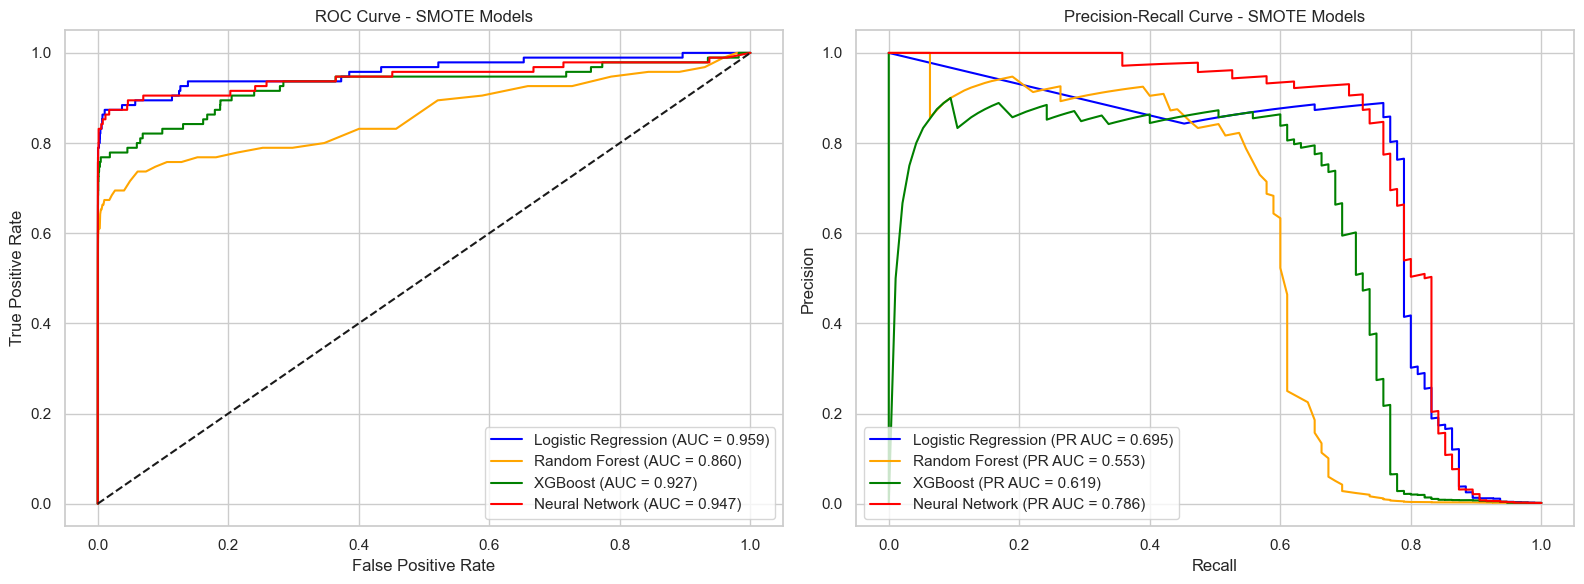

In [57]:
model_probs = {
    "Logistic Regression": y_pred_lr_smote,
    "Random Forest": y_pred_rf_smote,
    "XGBoost": y_pred_xgb_smote,
    "Neural Network": y_pred_nn_smote
}

colors = {
    "Logistic Regression": "blue",
    "Random Forest": "orange",
    "XGBoost": "green",
    "Neural Network": "red"
}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# ROC Curve
for name, probs in model_probs.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    ax1.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})", color=colors[name])
ax1.plot([0, 1], [0, 1], 'k--')
ax1.set_title("ROC Curve - SMOTE Models")
ax1.set_xlabel("False Positive Rate")
ax1.set_ylabel("True Positive Rate")
ax1.legend()

# PR Curve
for name, probs in model_probs.items():
    precision, recall, _ = precision_recall_curve(y_test, probs)
    pr_auc = average_precision_score(y_test, probs)
    ax2.plot(recall, precision, label=f"{name} (PR AUC = {pr_auc:.3f})", color=colors[name])
ax2.set_title("Precision-Recall Curve - SMOTE Models")
ax2.set_xlabel("Recall")
ax2.set_ylabel("Precision")
ax2.legend()

plt.tight_layout()
plt.show()


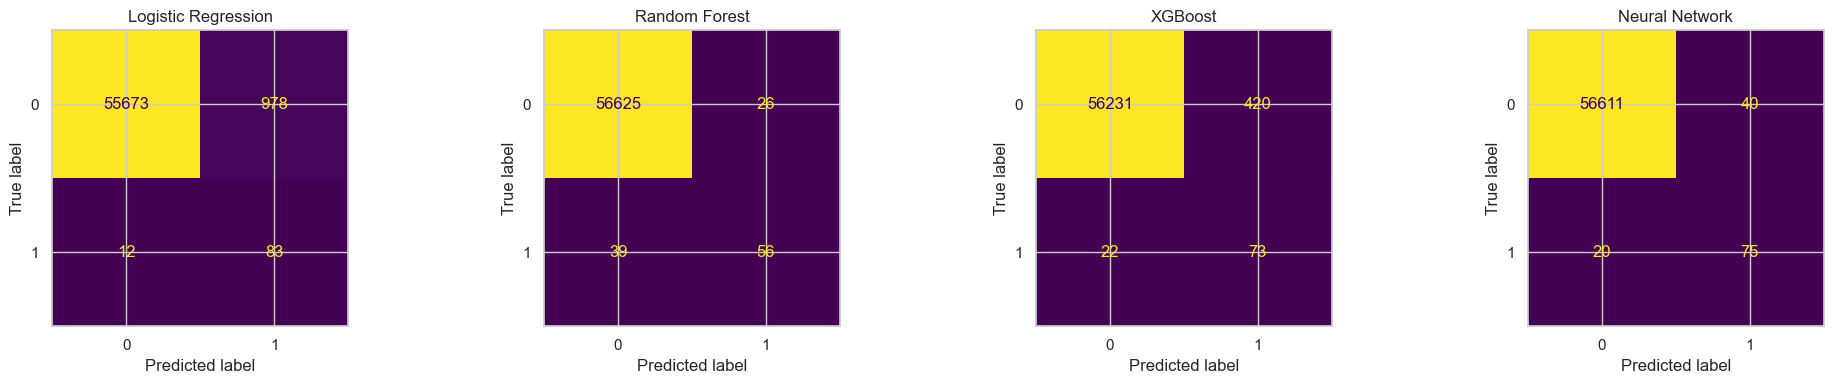

In [58]:
model_preds_bin = {
    "Logistic Regression": y_bin_lr_smote,
    "Random Forest": y_bin_rf_smote,
    "XGBoost": y_bin_xgb_smote,
    "Neural Network": y_bin_nn_smote
}

fig, axes = plt.subplots(1, 4, figsize=(20, 4))
for ax, (name, preds) in zip(axes, model_preds_bin.items()):
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, colorbar=False)
    ax.set_title(name)
plt.tight_layout()
plt.show()


In [59]:
summary_data = []

model_outputs = {
    "Logistic Regression": (y_test, y_bin_lr_smote, y_pred_lr_smote),
    "Random Forest": (y_test, y_bin_rf_smote, y_pred_rf_smote),
    "XGBoost": (y_test, y_bin_xgb_smote, y_pred_xgb_smote),
    "Neural Network": (y_test, y_bin_nn_smote, y_pred_nn_smote)
}

for model_name, (y_true, y_pred, y_proba) in model_outputs.items():
    report = classification_report(y_true, y_pred, output_dict=True, zero_division=0)
    precision, recall, _ = precision_recall_curve(y_true, y_proba)
    pr_auc = average_precision_score(y_true, y_proba)
    roc_auc = roc_auc_score(y_true, y_proba)

    summary_data.append({
        "Model": model_name,
        "Recall (Fraud)": round(report["1"]["recall"], 4),
        "Precision (Fraud)": round(report["1"]["precision"], 4),
        "F1-Score (Fraud)": round(report["1"]["f1-score"], 4),
        "ROC AUC": round(roc_auc, 4),
        "PR AUC": round(pr_auc, 4)
    })

summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.sort_values(by="Recall (Fraud)", ascending=False)
summary_df.style.set_caption("Tuned Model Performance Summary (SMOTE Data)") \
    .format(precision=4) \
    .set_table_styles([{"selector": "caption", "props": [("font-size", "16px"), ("font-weight", "bold")]}])


,Model,Recall (Fraud),Precision (Fraud),F1-Score (Fraud),ROC AUC,PR AUC
0,Logistic Regression,0.8737,0.0782,0.1436,0.9588,0.6953
3,Neural Network,0.7895,0.6522,0.7143,0.9470,0.7860
2,XGBoost,0.7684,0.1481,0.2483,0.9271,0.6186
1,Random Forest,0.5895,0.6829,0.6328,0.8599,0.5534


Summary:
- Best Performer (Overall Balance):
    - Neural Network is most balanced: strong recall, good precision → highest F1-score.
- Runner-Up:
    - Logistic Regression gets highest recall, which is crucial in fraud detection, but precision is too low → many false alarms.
- Least Effective:
    - Random Forest: very low recall (misses many frauds), despite decent precision. Not ideal for our goal.

## Model Performance Comparison Summary

This section compares the performance of all models across different data processing strategies:

- **Baseline** (Unbalanced Data)
- **Class Weighting**
- **Class Weighting + Hyperparameter Tuning**
- **SMOTE + Hyperparameter Tuning**

### Performance Metrics Table


| Phase                 | Model               | Recall (Fraud) | Precision (Fraud) | F1-Score (Fraud) | ROC AUC | PR AUC |
|-----------------------|---------------------|----------------|-------------------|------------------|---------|--------|
| Baseline              | Logistic Regression | 0.5789         | 0.8462            | 0.6875           | 0.9585  | 0.6979 |
| Baseline              | Random Forest       | 0.7263         | 0.9583            | 0.8263           | 0.9242  | 0.8009 |
| Baseline              | XGBoost             | 0.7368         | 0.9722            | 0.8383           | 0.9669  | 0.8044 |
| Baseline              | Neural Network      | 0.5684         | 0.9818            | 0.7200           | 0.9524  | 0.7797 |
| Class Weight          | Logistic Regression | 0.8737         | 0.0556            | 0.1045           | 0.9657  | 0.7116 |
| Class Weight          | Random Forest       | 0.7053         | 0.9710            | 0.8171           | 0.9246  | 0.8142 |
| Class Weight          | XGBoost             | 0.7684         | 0.9359            | 0.8439           | 0.9657  | 0.8219 |
| Class Weight          | Neural Network      | 0.8737         | 0.0640            | 0.1193           | 0.9535  | 0.7374 |
| Class Weight + Tuning | Logistic Regression | 0.8737         | 0.0556            | 0.1045           | 0.9657  | 0.6744 |
| Class Weight + Tuning | Random Forest       | 0.7368         | 0.8861            | 0.8046           | 0.9696  | 0.7735 |
| Class Weight + Tuning | XGBoost             | 0.8105         | 0.4936            | 0.6135           | 0.9766  | 0.7735 |
| Class Weight + Tuning | Neural Network      | 0.7789         | 0.7551            | 0.7668           | 0.9512  | 0.7065 |
| SMOTE + Tuning        | Logistic Regression | 0.8737         | 0.0782            | 0.1436           | 0.9588  | 0.6953 |
| SMOTE + Tuning        | Random Forest       | 0.5895         | 0.6829            | 0.6328           | 0.8599  | 0.5534 |
| SMOTE + Tuning        | XGBoost             | 0.7684         | 0.1481            | 0.2483           | 0.9271  | 0.6186 |
| SMOTE + Tuning        | Neural Network      | 0.7895         | 0.6522            | 0.7143           | 0.9470  | 0.7860 |

---

### Model of choice

Class weighted and tuned NN and random forest performed really well and both can be selected as the best option. We go with the NN solution.

- **Best Overall Model (Recall-focused)**:  
  **Neural Network (Tuned + Class Weight)**  
  This model demonstrates **strong and balanced performance** across all metrics
  
 


In [60]:
best_nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 96)             │         2,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 96)             │        12,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,873 (108.88 KB)

 Trainable params: 27,873 (108.88 KB)

 Non-trainable params: 0 (0.00 B)

*** Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [61]:
import numpy as np
import pandas as pd
from deepchecks.tabular import Dataset
from deepchecks.tabular.suites import model_evaluation

# --- 1. Wrap the TensorFlow model ---
class KerasModelWrapper:
    def __init__(self, model):
        self.model = model

    def predict(self, X):
        probs = self.model.predict(X)
        return np.argmax(probs, axis=1)

    def predict_proba(self, X):
        return self.model.predict(X)

wrapped_best_nn = KerasModelWrapper(best_nn)

# --- 2. Create Deepchecks Datasets ---
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

train_ds = Dataset(X_train_scaled_df, label=y_train, cat_features=[])
test_ds = Dataset(X_test_scaled_df, label=y_test, cat_features=[])

# --- 3. Run Deepchecks Model Evaluation ---
suite = model_evaluation()
result = suite.run(train_dataset=train_ds, test_dataset=test_ds, model=wrapped_best_nn)

# --- 4. Show or save results ---
result.show()  # for notebook
# result.save_as_html("deepchecks_tensorflow_nn_report.html")  # for offline use


7094/7094 ━━━━━━━━━━━━━━━━━━━━ 1s 204us/step
1774/1774 ━━━━━━━━━━━━━━━━━━━━ 0s 203us/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


deepchecks - WARNING - Could not find model's classes, using the observed classes. In order to make sure the classes used by the model are inferred correctly, please use the model_classes argument


7094/7094 ━━━━━━━━━━━━━━━━━━━━ 2s 216us/step
1774/1774 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 1s 203us/step
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 1s 199us/step
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 1s 200us/step
1774/1774 ━━━━━━━━━━━━━━━━━━━━ 0s 212us/step
1774/1774 ━━━━━━━━━━━━━━━━━━━━ 0s 216us/step
1774/1774 ━━━━━━━━━━━━━━━━━━━━ 0s 203us/step
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 1s 202us/step
1774/1774 ━━━━━━━━━━━━━━━━━━━━ 0s 201us/step
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 1s 202us/step
1774/1774 ━━━━━━━━━━━━━━━━━━━━ 0s 203us/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 1s 206us/step
1774/1774 ━━━━━━━━━━━━━━━━━━━━ 0s 204us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1774/1774 ━━━━━━━━━━━━━━━━━━━━ 0s 220us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step
7

deepchecks - WARNING - Could not find built-in feature importance on the model, using permutation feature importance calculation instead


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step


deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 105 seconds


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


deepchecks - WARNING - Could not find built-in feature importance on the model, using permutation feature importance calculation instead


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step


deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 105 seconds


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_BYXHTFQE97C9VBGFAZJLJB3SN">Model Evaluation S…

## 5. Model Deployement
- Finalize your model with whole dataset and prepare for the deployment.

### Save and Export the Best Model


In [65]:
def save_baseline_models(lr_model, rf_model, xgb_model, tf_model, folder_name):
    """
    Save sklearn and tensorflow models into a specified folder.
    
    Parameters:
        lr_model: Trained LogisticRegression model
        rf_model: Trained RandomForestClassifier model
        xgb_model: Trained XGBClassifier model
        tf_model:  Trained TensorFlow (Keras) model
        folder_name (str): Folder to store models (required)
    """
    if not folder_name or not isinstance(folder_name, str):
        raise ValueError("'folder_name' is required and must be a non-empty string.")

    # Create folder if it doesn't exist
    os.makedirs(folder_name, exist_ok=True)

    # Define file paths with folder name in file names
    lr_path = os.path.join(folder_name, f'lr_model_{folder_name}.pkl')
    rf_path = os.path.join(folder_name, f'rf_model_{folder_name}.pkl')
    xgb_path = os.path.join(folder_name, f'xgb_model_{folder_name}.pkl')
    tf_path = os.path.join(folder_name, f'nn_tf_model_{folder_name}.keras')

    # Save Scikit-learn models
    with open(lr_path, 'wb') as f:
        pickle.dump(lr_model, f)

    with open(rf_path, 'wb') as f:
        pickle.dump(rf_model, f)

    with open(xgb_path, 'wb') as f:
        pickle.dump(xgb_model, f)

    # Save TensorFlow model
    tf_model.save(tf_path)

    print(f"All models saved in '{folder_name}/' with folder name in file names.")

In [66]:
# save models
save_baseline_models(best_lr_smote, best_rf_smote, best_xgb_smote, best_nn_smote, folder_name='smote')
save_baseline_models(best_lr, best_rf, best_xgb, best_nn, folder_name='tuned')
save_baseline_models(lr_balanced, rf_balanced, xgb_balanced, nn_balanced, folder_name='balanced')
save_baseline_models(lr, rf, xgb, nn_tf, folder_name='baseline')

All models saved in 'smote/' with folder name in file names.
All models saved in 'tuned/' with folder name in file names.
All models saved in 'balanced/' with folder name in file names.
All models saved in 'baseline/' with folder name in file names.


### Save and Export Variables

In [67]:
# Save the RobustScaler using pickle
scaler_path = "robust_scaler.pkl"
with open(scaler_path, 'wb') as f:
    pickle.dump(scaler, f)

print(f"Scaler saved to: {scaler_path}")

Scaler saved to: robust_scaler.pkl


In [68]:
# Save the RobustScaler smote using pickle
scaler_smote_path = "robust_scaler_smote.pkl"
with open(scaler_smote_path, 'wb') as f:
    pickle.dump(scaler_smote, f)

print(f"Scaler smote saved to: {scaler_smote_path}")

Scaler smote saved to: robust_scaler_smote.pkl


In [69]:
# Select only numeric features (excluding target)
feature_cols = df.drop(columns='Class').columns

# Calculate min, max, and mean
feature_stats = df[feature_cols].agg(['min', 'max', 'mean']).T
feature_stats = feature_stats.rename(columns={'min': 'Min', 'max': 'Max', 'mean': 'Mean'})

print(feature_stats.head())

           Min        Max      Mean
V1  -56.407510   2.454930  0.005917
V2  -72.715728  22.057729 -0.004135
V3  -48.325589   9.382558  0.001613
V4   -5.683171  16.875344 -0.002966
V5 -113.743307  34.801666  0.001828


In [70]:
feature_stats_path = "feature_stats.json"
feature_stats.to_json(feature_stats_path, orient="index")
print(f"Feature stats saved to: {feature_stats_path}")

Feature stats saved to: feature_stats.json


In [71]:
feature_cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Hour'],
      dtype='object')

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___